In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score
from  ydata_profiling import profile_report
import regex
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from patsy import dmatrices

import statsmodels.formula.api as smf
import pickle

In [2]:
stock_df = pd.read_csv('Inventory_Stock_Data.csv')
sales_df = pd.read_csv('Sales_Shipment_Data.csv')

In [3]:
sales_df.columns

Index(['Product Category Id', 'Category Name', 'Class', 'Customer City',
       'Customer Country', 'Customer Fname', 'Customer Id', 'Customer Lname',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Customer Zipcode', 'Delivery Status', 'Department Id',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Id', 'Order Region', 'Order State',
       'Order Status', 'Product Id', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode', 'Type',
       'Benefit per order', 'Days for shipment (scheduled)',
       'Days for shipping (real)', 'Latitude', 'Longitude',
       'Order Customer Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Order Item Total',
       'Order Profit Per Order', 'Product Price', 'Sales',
       'Sales per customer'],
      dtype='object

In [4]:
stock_df.columns

Index(['order-now', 'product id', 'product name', 'avg lead time',
       'avg order qty', 'current stock', 'max lead time', 'max order qty',
       'mod', 'reorder point', 'safety stock'],
      dtype='object')

In [5]:
df = pd.merge(left=sales_df,right=stock_df,left_on=['Product Id','Product Name'],right_on=['product id','product name'],how='inner')

In [6]:
stock_df.shape

(118, 11)

In [7]:
sales_df.shape

(180519, 46)

# 1. Number of rows & Number of columns


In [8]:
df.shape

(180519, 57)

# 2. Number of numerical & categorical columns


In [9]:
df.select_dtypes(include='object').shape[1]

24

In [10]:
df.select_dtypes(exclude='object').shape[1]

33

# 3. Any other observations from the data in terms of cleaning, preparation required?


In [11]:
df.drop(columns=['product id', 'product name'],inplace=True)

In [12]:
df.shape

(180519, 55)

In [13]:
df.isnull().sum().sum()

11

In [14]:
print((df['Product Price']==df['Order Item Product Price']).sum(),'\
\n',(df['Sales per customer']==df['Order Item Total']).sum(),'\
\n',(df['Customer Id']==df['Order Customer Id']).sum(),'\
\n',(df['Order Item Cardprod Id']==df['Product Id']).sum() ,'\
\n',(df['Benefit per order']==df['Order Profit Per Order']).sum())

180519 
 180519 
 180519 
 180519 
 180519


In [15]:
# these all columns have duplicated data

# 4.  Detailed EDA - Univariate & Bi Variate analysis for each variable (distributions)

since we have large dataset containing 57 columns.I'am performing ydataprofiling on dataset to do univariant and Bi-variant
Analysis.were we can check for quality of data,data distribution,distinct items,Bi-variant analysis using correlation between
columns.we can also visualize the data also   


In [16]:
df.columns

Index(['Product Category Id', 'Category Name', 'Class', 'Customer City',
       'Customer Country', 'Customer Fname', 'Customer Id', 'Customer Lname',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Customer Zipcode', 'Delivery Status', 'Department Id',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Id', 'Order Region', 'Order State',
       'Order Status', 'Product Id', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode', 'Type',
       'Benefit per order', 'Days for shipment (scheduled)',
       'Days for shipping (real)', 'Latitude', 'Longitude',
       'Order Customer Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Order Item Total',
       'Order Profit Per Order', 'Product Price', 'Sales',
       'Sales per customer', 'order-now', 'avg le

In [17]:
cat_df = df[['Category Name','Class','Customer Country','Customer City','Customer Segment','Customer State','Delivery Status',\
'Department Name','Market','Order City','Order Country','Order Region','Order State','Order Status','Product Name','Shipping Mode','Type','order-now']]
num_df=df[['Benefit per order','Days for shipment (scheduled)', 'Days for shipping (real)','Order Item Discount','Order Item Discount Rate','Product Price','Order Item Profit Ratio','Order Item Quantity','Order Profit Per Order','Sales', 'Sales per customer', 'avg lead time', 'avg order qty',\
'current stock', 'max lead time', 'max order qty', 'mod','reorder point', 'safety stock']]      

In [18]:
# we will perform distribution plot on categorical variables and calculate mode for categorical variables
cat_df.mode().stack()

0  Category Name                                 Cleats
   Class                        High Value-Small Number
   Customer Country                             EE. UU.
   Customer City                                 Caguas
   Customer Segment                            Consumer
   Customer State                                    PR
   Delivery Status                                 Late
   Department Name                             Fan Shop
   Market                                         LATAM
   Order City                             Santo Domingo
   Order Country                         Estados Unidos
   Order Region                         Central America
   Order State                               Inglaterra
   Order Status                                Complete
   Product Name        Perfect Fitness Perfect Rip Deck
   Shipping Mode                         Standard Class
   Type                                           DEBIT
   order-now                                    

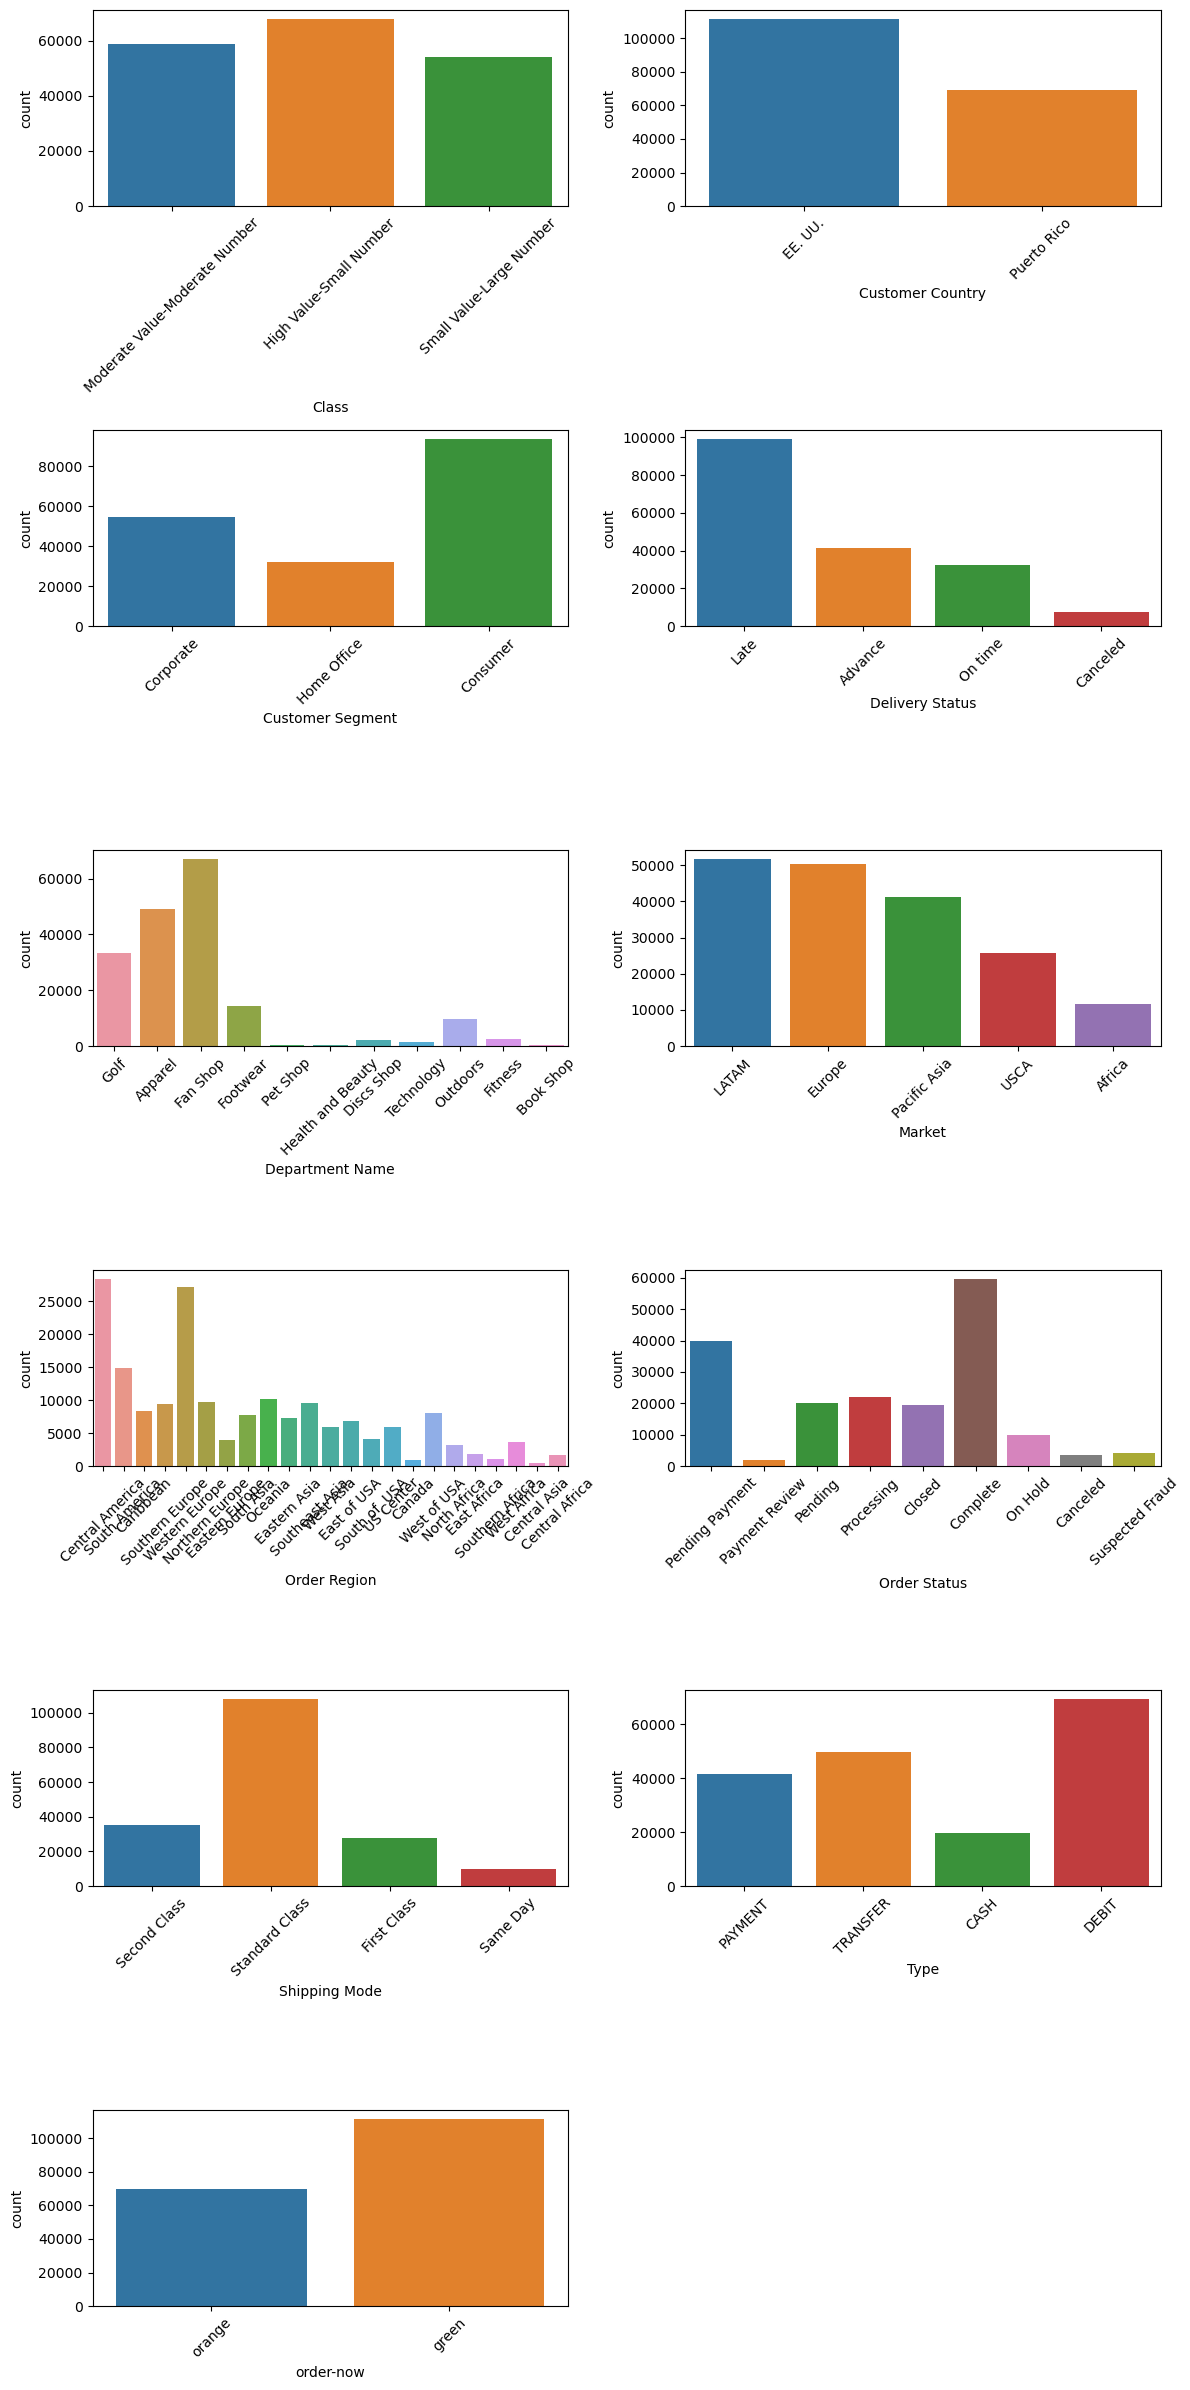

In [23]:
cat_dist=cat_df[['Class','Customer Country','Customer Segment', 'Delivery Status','Department Name', 'Market','Order Region','Order Status',\
                      'Shipping Mode','Type','order-now']]
# distribution plot for categorical variables
i=1
plt.figure(figsize=(12,24))
for column in cat_dist:
    plt.subplot(6,2,i)
    sns.countplot(data=cat_dist,x=column)
    plt.xticks(rotation=45)
    i+=1
    plt.tight_layout()
    

In [24]:
# distribution plot for numrical variables
num_df.apply([np.mean,np.median,np.var,np.std]).T

mean      median           var  \
Benefit per order               21.974989   31.520000  10906.361300   
Days for shipment (scheduled)    2.931847    4.000000      1.889111   
Days for shipping (real)         3.497654    3.000000      2.636473   
Order Item Discount             20.664741   14.000000    475.279282   
Order Item Discount Rate         0.101668    0.100000      0.004958   
Product Price                  141.232550   59.990002  19525.169322   
Order Item Profit Ratio          0.120647    0.270000      0.217898   
Order Item Quantity              2.127638    1.000000      2.112521   
Order Profit Per Order          21.974989   31.520000  10906.361300   
Sales                          203.772096  199.919998  17496.167031   
Sales per customer             183.107609  163.990005  14410.482714   
avg lead time                   10.000000   10.000000      0.000000   
avg order qty                    2.127970    3.000000      0.983629   
current stock                  168.282159  175.000000  12977.992728   
max lead time                   30.000000   30.000000      0.000000   
max order qty                    3.255940    5.000000      3.934517   
mod                              0.615414    1.000000      0.236681   
reorder point                  113.957894  175.000000   4819.782841   
safety stock                    93.003279  145.000000   3575.342714   

                                      std  
Benefit per order              104.433526  
Days for shipment (scheduled)    1.374449  
Days for shipping (real)         1.623722  
Order Item Discount             21.800901  
Order Item Discount Rate         0.070415  
Product Price                  139.732492  
Order Item Profit Ratio          0.466796  
Order Item Quantity              1.453451  
Order Profit Per Order         104.433526  
Sales                          132.273077  
Sales per customer             120.043670  
avg lead time                    0.000000  
avg order qty                    0.991781  
current stock                  113.920993  
max lead time                    0.000000  
max order qty                    1.983562  
mod                              0.486499  
reorder point                   69.424656  
safety stock                    59.794170

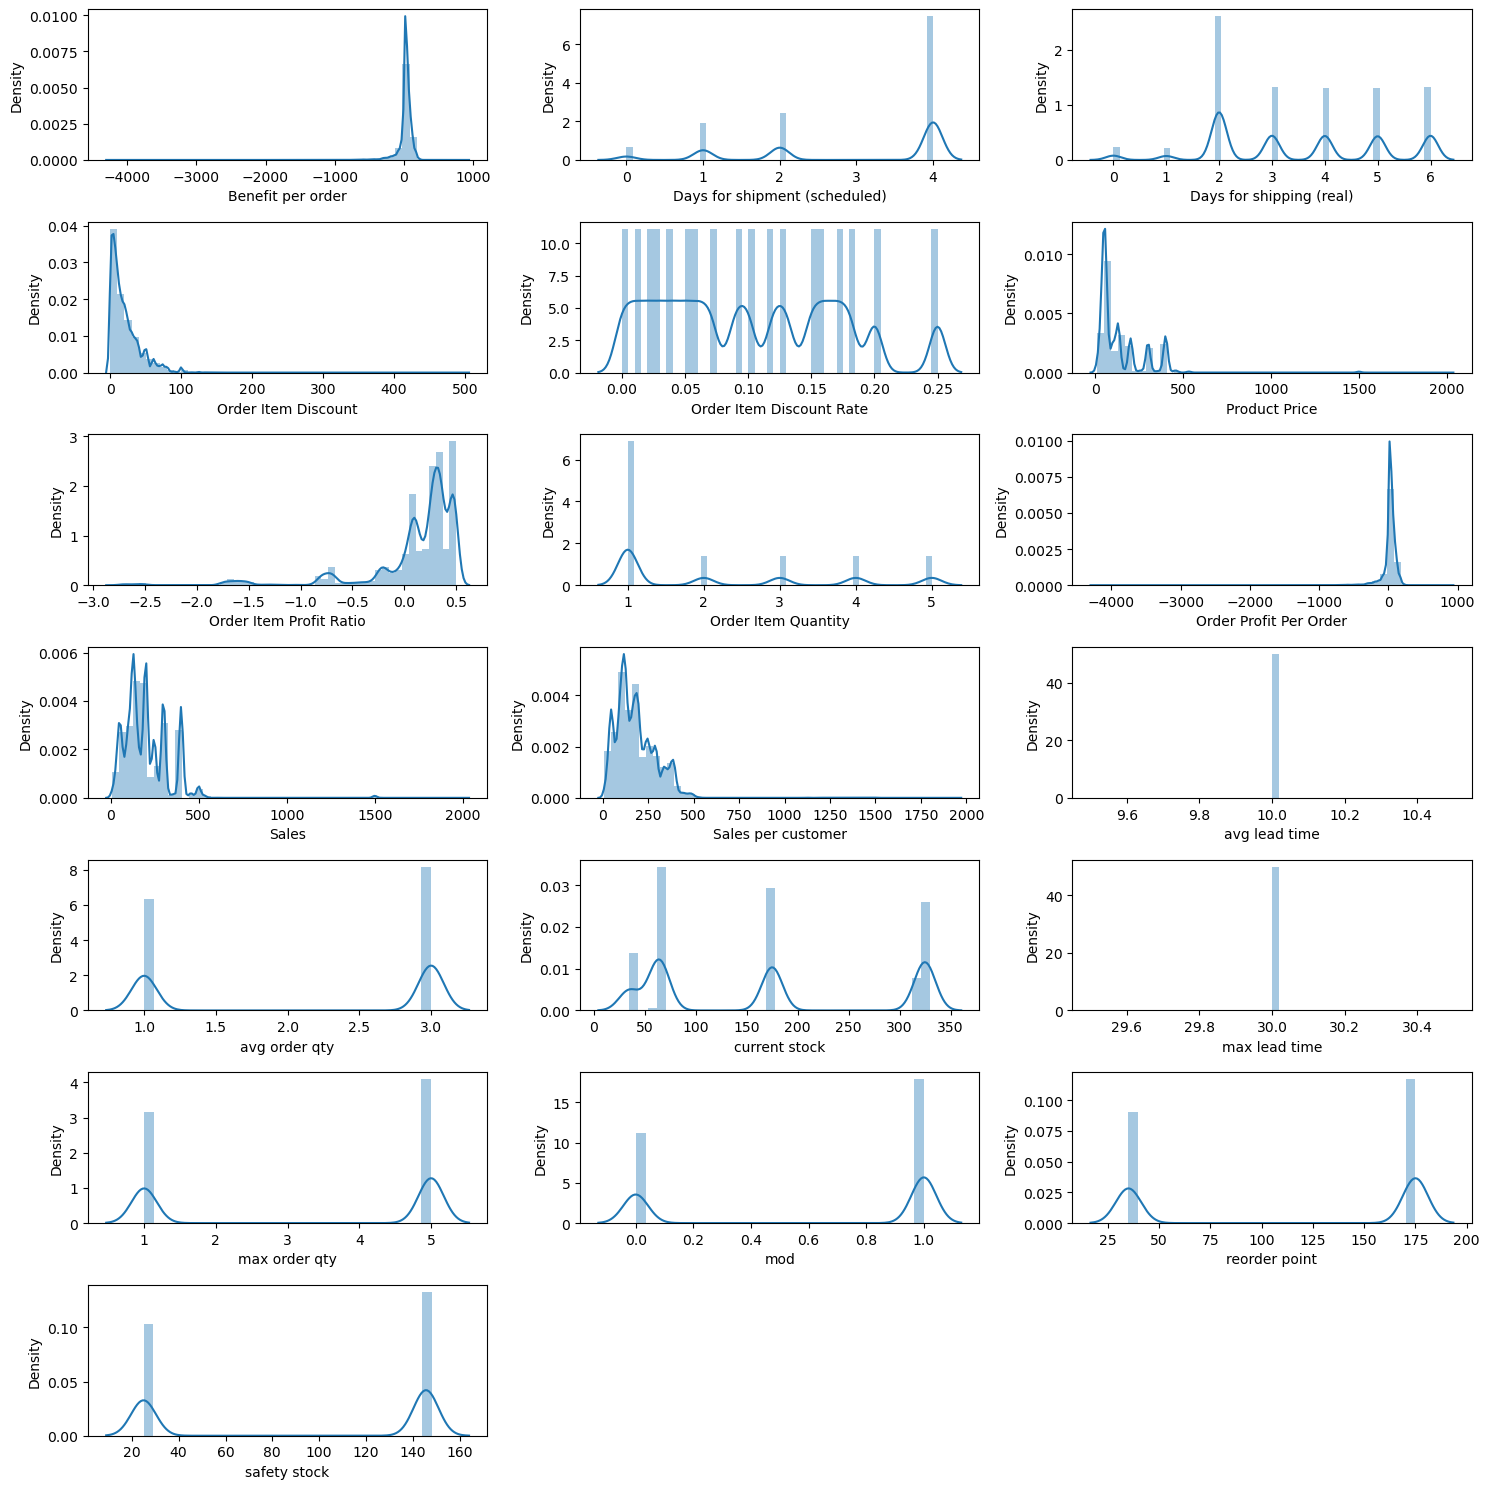

In [25]:
i=1
plt.figure(figsize=(15,15))
for column in num_df:
    
    plt.subplot(7,3,i)
    sns.distplot(num_df[column])
    i+=1
    plt.tight_layout()

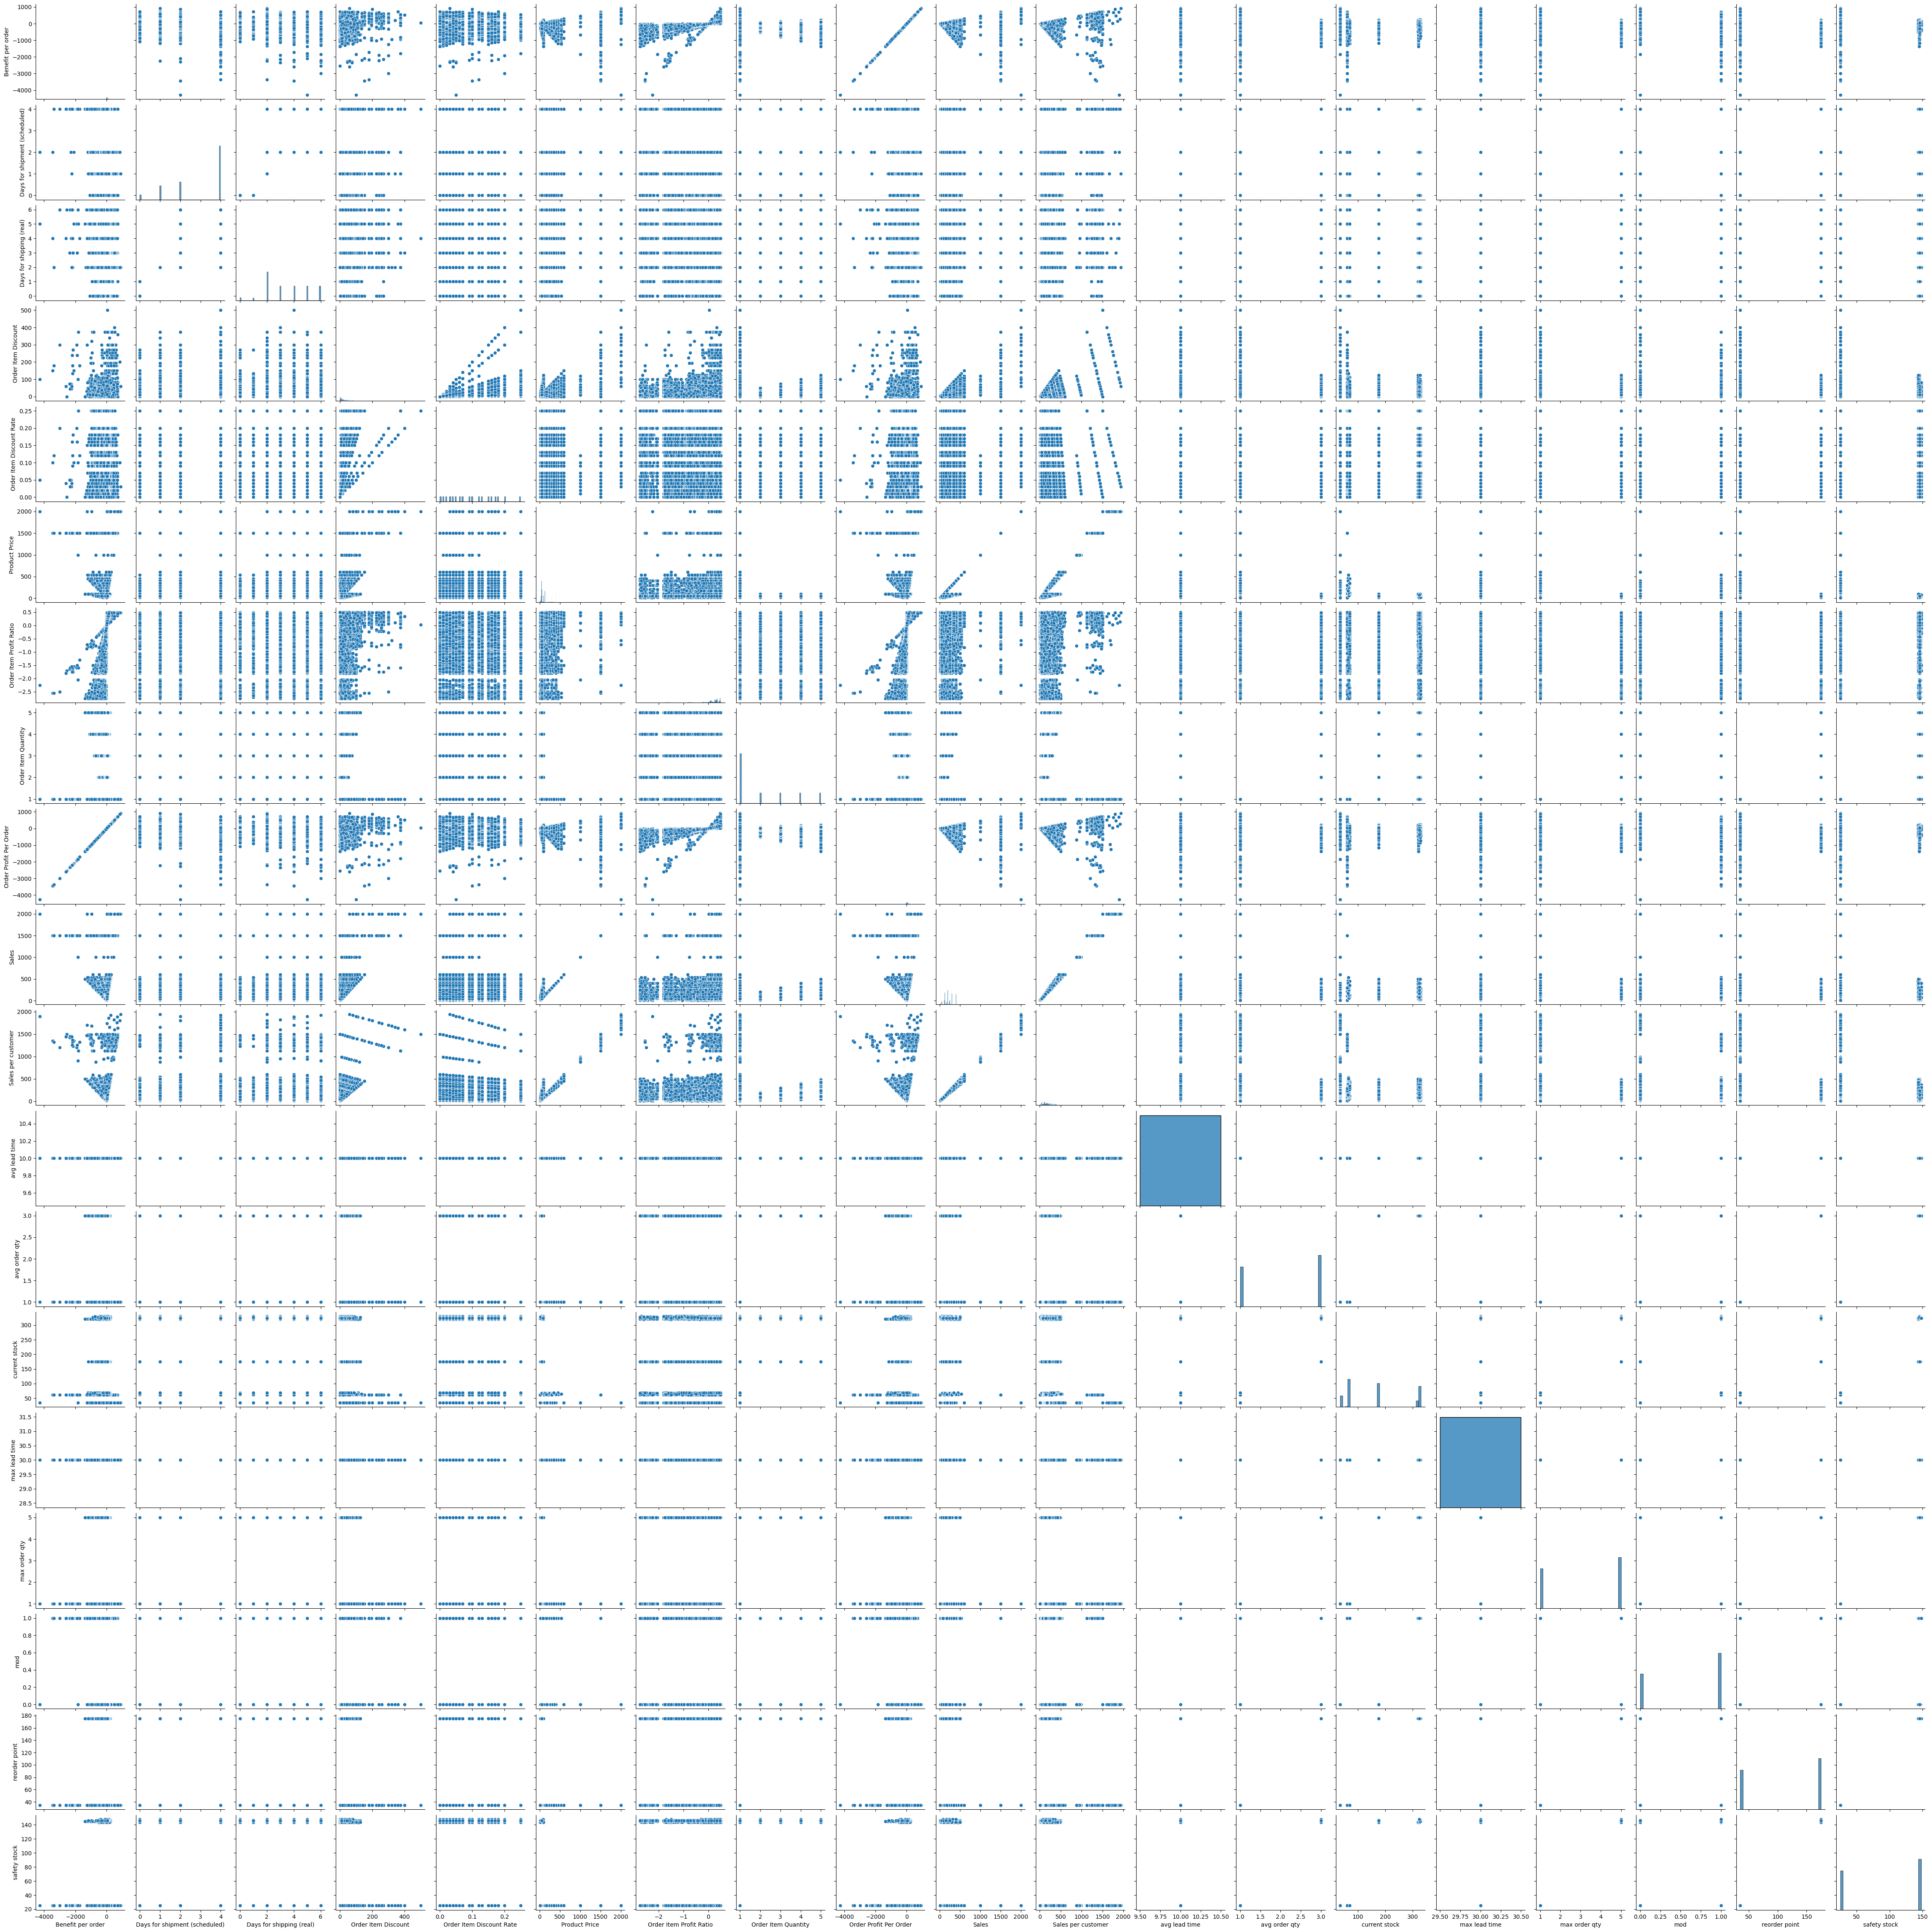

In [26]:
# for Bi-variate anlysis we will perform scatter plot on num_df
sns.pairplot(num_df)


In [19]:
# we will calculate co-relation for bi-variant anlysis and plot heat map
a = num_df.corr().dropna(how='all',axis=1).dropna(how='all').round(2)
a

Benefit per order  \
Benefit per order                           1.00   
Days for shipment (scheduled)              -0.00   
Days for shipping (real)                   -0.01   
Order Item Discount                         0.06   
Order Item Discount Rate                   -0.02   
Product Price                               0.10   
Order Item Profit Ratio                     0.82   
Order Item Quantity                         0.02   
Order Profit Per Order                      1.00   
Sales                                       0.13   
Sales per customer                          0.13   
avg order qty                              -0.04   
current stock                              -0.03   
max order qty                              -0.04   
mod                                        -0.01   
reorder point                              -0.04   
safety stock                               -0.04   

                               Days for shipment (scheduled)  \
Benefit per order                                      -0.00   
Days for shipment (scheduled)                           1.00   
Days for shipping (real)                                0.52   
Order Item Discount                                     0.00   
Order Item Discount Rate                                0.00   
Product Price                                           0.01   
Order Item Profit Ratio                                -0.00   
Order Item Quantity                                    -0.00   
Order Profit Per Order                                 -0.00   
Sales                                                   0.01   
Sales per customer                                      0.01   
avg order qty                                          -0.00   
current stock                                          -0.00   
max order qty                                          -0.00   
mod                                                    -0.00   
reorder point                                          -0.00   
safety stock                                           -0.00   

                               Days for shipping (real)  Order Item Discount  \
Benefit per order                                 -0.01                 0.06   
Days for shipment (scheduled)                      0.52                 0.00   
Days for shipping (real)                           1.00                 0.00   
Order Item Discount                                0.00                 1.00   
Order Item Discount Rate                           0.00                 0.66   
Product Price                                      0.00                 0.49   
Order Item Profit Ratio                           -0.00                -0.00   
Order Item Quantity                               -0.00                 0.07   
Order Profit Per Order                            -0.01                 0.06   
Sales                                              0.00                 0.62   
Sales per customer                                 0.00                 0.50   
avg order qty                                      0.00                -0.20   
current stock                                      0.00                -0.15   
max order qty                                      0.00                -0.20   
mod                                                0.00                -0.03   
reorder point                                      0.00                -0.20   
safety stock                                       0.00                -0.20   

                               Order Item Discount Rate  Product Price  \
Benefit per order                                 -0.02           0.10   
Days for shipment (scheduled)                      0.00           0.01   
Days for shipping (real)                           0.00           0.00   
Order Item Discount                                0.66           0.49   
Order Item Discount Rate                           1.00           0.00   
Product Price                                      0.00 

<Axes: >

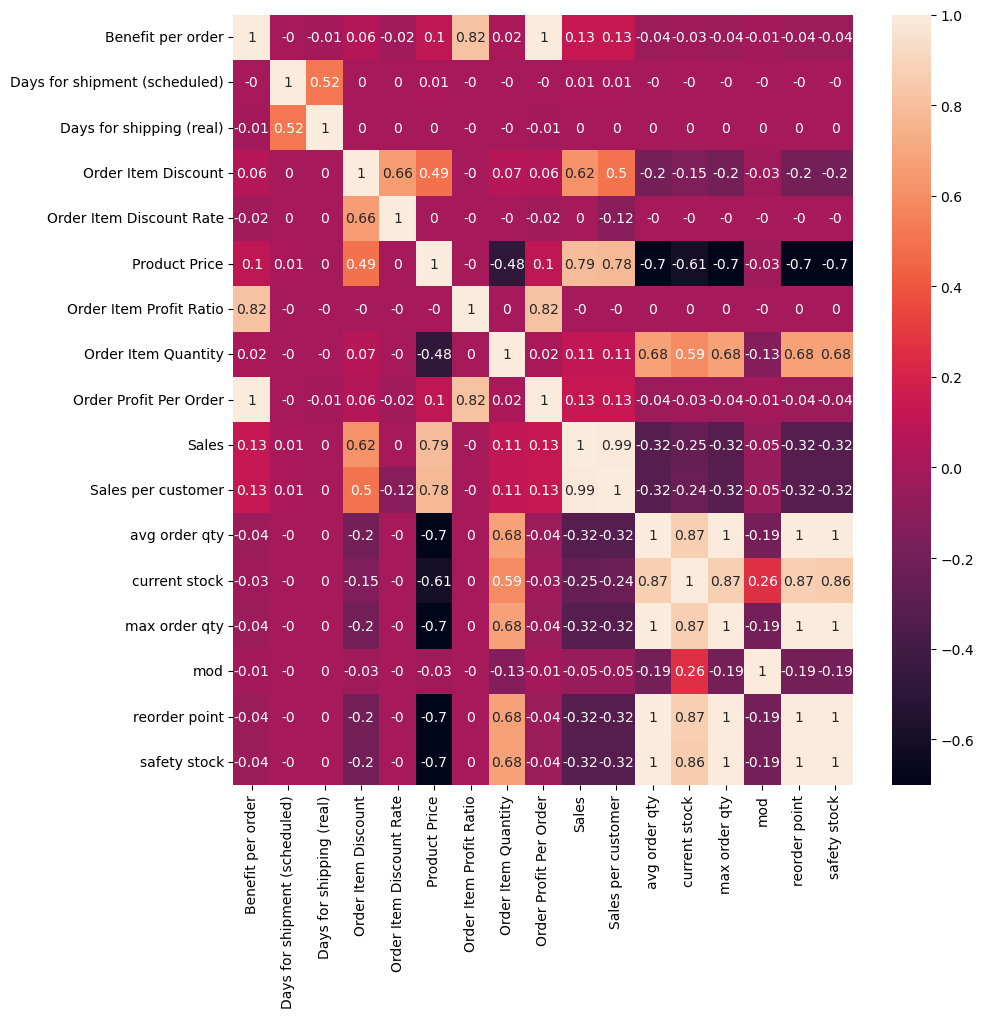

In [28]:
# Heat map 
plt.figure(figsize=(10,10))
sns.heatmap(a,annot=True)

# 5. Find out data related issues based on the data Audit


In [20]:
df.select_dtypes(exclude='object').dtypes

Product Category Id                int64
Customer Id                        int64
Customer Zipcode                 float64
Department Id                      int64
Order Id                           int64
Product Id                         int64
Benefit per order                float64
Days for shipment (scheduled)      int64
Days for shipping (real)           int64
Latitude                         float64
Longitude                        float64
Order Customer Id                  int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id                      int64
Order Item Product Price         float64
Order Item Profit Ratio          float64
Order Item Quantity                int64
Order Item Total                 float64
Order Profit Per Order           float64
Product Price                    float64
Sales                            float64
Sales per customer               float64
avg lead time   

# b. Data Preparation
 


In [21]:
# As i have mentioned above there are duplicated columns we will drop redundant columns
df.drop(columns=['Order Item Product Price','Order Item Total','Order Customer Id','Order Item Cardprod Id','Order Profit Per Order'],inplace=True)

In [22]:
df.shape

(180519, 50)

# 1. Creat new flag variable Late Delivery Risk based on Days for shipping (real) & Days for shipment (scheduled) (Flag=Not Late if shipment is not delayed and Flag=Late if shipment is delayed)									


In [23]:
df['Late Delivery Risk'] = np.where(df['Days for shipping (real)']<=df['Days for shipment (scheduled)'],'Not Late','Late')

# 2. Rename the variables as per python naming convensions


In [24]:
df.columns = df.columns.str.replace('(',"").str.replace(')',"").str.replace('-',"").str.replace(" ","_").str.lower()

In [25]:
df.columns

Index(['product_category_id', 'category_name', 'class', 'customer_city',
       'customer_country', 'customer_fname', 'customer_id', 'customer_lname',
       'customer_segment', 'customer_state', 'customer_street',
       'customer_zipcode', 'delivery_status', 'department_id',
       'department_name', 'market', 'order_city', 'order_country',
       'order_date_dateorders', 'order_id', 'order_region', 'order_state',
       'order_status', 'product_id', 'product_name',
       'shipping_date_dateorders', 'shipping_mode', 'type',
       'benefit_per_order', 'days_for_shipment_scheduled',
       'days_for_shipping_real', 'latitude', 'longitude',
       'order_item_discount', 'order_item_discount_rate', 'order_item_id',
       'order_item_profit_ratio', 'order_item_quantity', 'product_price',
       'sales', 'sales_per_customer', 'ordernow', 'avg_lead_time',
       'avg_order_qty', 'current_stock', 'max_lead_time', 'max_order_qty',
       'mod', 'reorder_point', 'safety_stock', 'late_delive

# 3. Convert the variables data types as per the data descriptions


In [26]:
df[['product_category_id','customer_id','customer_zipcode','department_id' ,'order_id','product_id','latitude','longitude',\
    'order_item_id']] = df[['product_category_id','customer_id','customer_zipcode','department_id' ,'order_id','product_id','latitude','longitude','order_item_id']].astype('object')
# converted numeric data types into categorical which have no computational significance                       
df['order_date_dateorders'] =pd.to_datetime(df['order_date_dateorders'],format='mixed')
df['shipping_date_dateorders'] = pd.to_datetime(df['shipping_date_dateorders'],format='mixed')
    

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   product_category_id          180519 non-null  object        
 1   category_name                180519 non-null  object        
 2   class                        180519 non-null  object        
 3   customer_city                180519 non-null  object        
 4   customer_country             180519 non-null  object        
 5   customer_fname               180519 non-null  object        
 6   customer_id                  180519 non-null  object        
 7   customer_lname               180511 non-null  object        
 8   customer_segment             180519 non-null  object        
 9   customer_state               180519 non-null  object        
 10  customer_street              180519 non-null  object        
 11  customer_zipcode          

In [28]:
df.select_dtypes('object').shape[1]

31

In [29]:
df.select_dtypes(exclude='object').shape[1]

20

# 4. Impute missing values with mean for numerical variables, mode for categorical variables									


In [30]:
# we know that only two columns have missing values that columns are categorical we used directly mode 
df = df.apply(lambda x:x.fillna(x.mode()[0]))

# 5. Perform any other data preparation steps as required?


In [31]:
#  data preparation steps to be performed
df['year'] =df['order_date_dateorders'].dt.year
df['month'] =df['order_date_dateorders'].dt.month
df['quarter']=np.where((df['month']<4),'Q1',np.where((df['month']<7),'Q2',np.where((df['month']<10),'Q3','Q4')))
df['weekofyear']= df['order_date_dateorders'].dt.isocalendar()['week']

# 1. Caclulate high level metrics like, total sale value, total sale units, inventory value, inventory quantity, profit value, number of distinct products, number of distinct categories, number of distinct products etc									


In [32]:
# Sales after discount
Total_revenue =df['sales_per_customer'].sum()
Total_revenue

33054402.380216617

In [33]:
# sale before discount
Revenue_without_discount=df['sales'].sum()
Revenue_without_discount

36784735.01337985

In [34]:
# Total number of products ordered
Total_qty = df['order_item_quantity'].sum()
Total_qty

384079

In [35]:
# current stock
current_stock = df['current_stock'].sum()
current_stock

30378127

In [36]:
# Inventory value
Inventory_value = (df['current_stock']*df['product_price']).sum()
Inventory_value 

2536160997.4468737

In [37]:
# profit per order
Total_profit = df['benefit_per_order'].sum()
Total_profit

3966902.974050357

In [38]:
# No of distinct products
num_of_products = df['product_id'].nunique()
num_of_products

118

In [39]:
# No of distinct categories
num_cat = df['product_category_id'].nunique()
num_cat

51

In [40]:
# 3 of distinct  classes are
df['class'].value_counts()

class
High Value-Small Number           67738
Moderate Value-Moderate Number    58781
Small Value-Large Number          54000
Name: count, dtype: int64

In [41]:
# penetration in country of customers
df['customer_country'].value_counts()


customer_country
EE. UU.        111146
Puerto Rico     69373
Name: count, dtype: int64

In [42]:
# Top  5 penetration in city of customers
df['customer_city'].value_counts().head(5)

customer_city
Caguas         66770
Chicago         3885
Los Angeles     3417
Brooklyn        3412
New York        1816
Name: count, dtype: int64

In [43]:
df['customer_segment'].value_counts()

customer_segment
Consumer       93504
Corporate      54789
Home Office    32226
Name: count, dtype: int64

In [44]:
df['department_name'].value_counts()

department_name
Fan Shop             66861
Apparel              48998
Golf                 33220
Footwear             14525
Outdoors              9686
Fitness               2479
Discs Shop            2026
Technology            1465
Pet Shop               492
Book Shop              405
Health and Beauty      362
Name: count, dtype: int64

In [45]:
df['order_city'].value_counts().head(5)

order_city
Santo Domingo    2211
New York City    2202
Los Angeles      1845
Tegucigalpa      1783
Managua          1682
Name: count, dtype: int64

# 2. Status of orders (number of orders by current status)


In [46]:
df['order_status'].value_counts()

order_status
Complete           59491
Pending Payment    39832
Processing         21902
Pending            20227
Closed             19616
On Hold             9804
Suspected Fraud     4062
Canceled            3692
Payment Review      1893
Name: count, dtype: int64

# 3. Status of Delivery of orders (number of orders by each type of delivery status)


In [47]:
df['delivery_status'].value_counts()

delivery_status
Late        98977
Advance     41592
On time     32196
Canceled     7754
Name: count, dtype: int64

# 4. Late Delivery Risk by time (by each week, month, year, quarter)


In [48]:
# yeary late delivery risk
df.groupby(by=['year'])[['late_delivery_risk']].value_counts()


year  late_delivery_risk
2015  Late                  35877
      Not Late              26773
2016  Late                  35841
      Not Late              26709
2017  Late                  30436
      Not Late              22760
2018  Late                   1246
      Not Late                877
Name: count, dtype: int64

In [215]:
# Mothly late delivery risk
df.groupby(by=['quarter'])[['late_delivery_risk']].value_counts().unstack()

late_delivery_risk   Late  Not Late
quarter                            
Q1                  27710     20717
Q2                  26599     19951
Q3                  27224     20099
Q4                  21867     16352

In [216]:
# monthl late delivery risk
df.groupby(by=['month'])[['late_delivery_risk']].value_counts().unstack().T

month                  1     2     3     4     5     6     7     8     9   \
late_delivery_risk                                                          
Late                10224  8319  9167  8754  9207  8638  9080  9213  8931   
Not Late             7755  6210  6752  6681  6769  6501  6842  6699  6558   

month                 10    11    12  
late_delivery_risk                    
Late                7365  7106  7396  
Not Late            5590  5394  5368

In [217]:
## week of year late delivery risk
df.groupby(by=['weekofyear'])[['late_delivery_risk']].value_counts().unstack().T

weekofyear            1     2     3     4     5     6     7     8     9   \
late_delivery_risk                                                         
Late                1954  2281  2375  2292  2235  2036  2098  1992  2114   
Not Late            1542  1732  1735  1799  1611  1488  1459  1655  1531   

weekofyear            10  ...    44    45    46    47    48    49    50    51  \
late_delivery_risk        ...                                                   
Late                2110  ...  1628  1735  1635  1651  1655  1657  1662  1608   
Not Late            1502  ...  1286  1222  1233  1302  1240  1237  1163  1217   

weekofyear            52   53  
late_delivery_risk             
Late                1712  721  
Not Late            1240  513  

[2 rows x 53 columns]

# 5. Order Item qty by time (by each week, month, year, quarter)


In [218]:
df.groupby(by=['year'])[['order_item_quantity']].sum().fillna(0)

order_item_quantity
year                     
2015               138480
2016               137352
2017               106124
2018                 2123

In [219]:
df.groupby(by=['quarter'])[['order_item_quantity']].sum()

order_item_quantity
quarter                     
Q1                    104539
Q2                    100627
Q3                    102085
Q4                     76828

In [220]:
df.groupby(by=['month'])[['order_item_quantity']].sum().T

month                   1      2      3      4      5      6      7      8   \
order_item_quantity  37179  32273  35087  33684  34538  32405  34543  34390   

month                   9      10     11     12  
order_item_quantity  33152  26129  25011  25688

In [221]:
df.groupby(by=['weekofyear'])[['order_item_quantity']].sum().T

weekofyear             1     2     3     4     5     6     7     8     9   \
order_item_quantity  7064  8200  8672  8540  8186  7812  7878  8163  8089   

weekofyear             10  ...    44    45    46    47    48    49    50  \
order_item_quantity  7951  ...  5761  5822  5821  5934  5773  5813  5670   

weekofyear             51    52    53  
order_item_quantity  5779  5938  2647  

[1 rows x 53 columns]

# 6. Sales units/value  by time (by each week, month, year, quarter)


In [222]:
df.groupby(by=['year'])[['order_item_quantity','sales']].agg({'order_item_quantity':np.sum,'sales':np.sum})

order_item_quantity         sales
year                                   
2015               138480  1.234083e+07
2016               137352  1.230382e+07
2017               106124  1.180844e+07
2018                 2123  3.316501e+05

In [223]:
df.groupby(by=['year'])[['order_item_quantity','sales']].agg({'order_item_quantity':np.sum,'sales':np.sum})

order_item_quantity         sales
year                                   
2015               138480  1.234083e+07
2016               137352  1.230382e+07
2017               106124  1.180844e+07
2018                 2123  3.316501e+05

In [224]:
df.groupby(by=['month'])[['order_item_quantity','sales']].agg({'order_item_quantity':np.sum,'sales':np.sum})

order_item_quantity         sales
month                                   
1                    37179  3.459246e+06
2                    32273  2.888088e+06
3                    35087  3.125112e+06
4                    33684  3.053996e+06
5                    34538  3.185364e+06
6                    32405  3.059152e+06
7                    34543  3.188170e+06
8                    34390  3.187032e+06
9                    33152  3.164511e+06
10                   26129  3.171279e+06
11                   25011  2.703625e+06
12                   25688  2.599160e+06

In [225]:
df.groupby(by=['weekofyear'])[['order_item_quantity','sales']].agg({'order_item_quantity':np.sum,'sales':np.sum})

order_item_quantity          sales
weekofyear                                    
1                          7064  729684.503659
2                          8200  789794.354346
3                          8672  731081.593856
4                          8540  761127.384836
5                          8186  769817.035622
6                          7812  691626.223329
7                          7878  713610.964081
8                          8163  721985.423667
9                          8089  713596.704159
10                         7951  704252.943897
11                         7846  713621.044274
12                         7672  687641.443884
13                         7973  704602.863729
14                         7979  720465.254684
15                         7940  719986.614364
16                         8247  737354.064329
17                         7452  680931.893121
18                         7715  719127.964536
19                         7738  716964.584104
20                         7792  714551.953859
21                         7653  705676.103941
22                         7999  741125.894740
23                         7491  701731.483644
24                         7204  701705.504078
25                         7920  736187.684495
26                         7654  715688.793632
27                         7950  740662.444542
28                         7765  714099.724107
29                         7948  736269.354333
30                         7540  692819.703417
31                         7748  713067.043571
32                         7653  699718.913913
33                         7760  725139.244633
34                         7672  730598.024612
35                         7968  718004.734072
36                         7753  729233.764479
37                         7793  752277.613394
38                         7650  725609.332539
39                         7886  773545.522705
40                         5682  500514.049425
41                         5951  661554.502700
42                         5810  665595.672682
43                         5762  935323.590290
44                         5761  742215.532341
45                         5822  610157.883382
46                         5821  702299.036655
47                         5934  613084.851162
48                         5773  565838.909062
49                         5813  500844.399317
50                         5670  526639.510996
51                         5779  667729.489940
52                         5938  661259.433757
53                         2647  236692.454488

# 7. Profit orders/value  by time (by each week, month, year, quarter)


In [226]:
df.loc[(df['benefit_per_order']>0)].groupby(by=['year'])[['order_id','benefit_per_order']].agg(profit_orders=('order_id','nunique'),sum_of_profit_orders=('benefit_per_order',np.sum))

profit_orders  sum_of_profit_orders
year                                     
2015          19725          2.632840e+06
2016          19748          2.620504e+06
2017          19811          2.527342e+06
2018           1698          6.976446e+04

In [227]:
df.loc[(df['benefit_per_order']>0)].groupby(by=['quarter'])[['order_id','benefit_per_order']].agg(profit_orders=('order_id','nunique'),sum_of_profit_orders=('benefit_per_order',np.sum))

profit_orders  sum_of_profit_orders
quarter                                     
Q1               16315          2.012187e+06
Q2               14696          1.986587e+06
Q3               14892          2.044259e+06
Q4               15079          1.807418e+06

In [228]:
df.loc[(df['benefit_per_order']>0)].groupby(by=['month'])[['order_id','benefit_per_order']].agg(profit_orders=('order_id','nunique'),sum_of_profit_orders=('benefit_per_order',np.sum))

profit_orders  sum_of_profit_orders
month                                     
1               6690         730886.019921
2               4595         616900.180183
3               5030         664400.310176
4               4869         656347.319895
5               5008         678696.409989
6               4819         651543.010184
7               5001         683976.139881
8               5033         682843.420259
9               4858         677439.869888
10              5084         679589.369641
11              4885         575038.210092
12              5110         552790.059710

In [229]:
df.loc[(df['benefit_per_order']>0)].groupby(by=['weekofyear'])[['order_id','benefit_per_order']].agg(profit_orders=('order_id','nunique'),sum_of_profit_orders=('benefit_per_order',np.sum))

profit_orders  sum_of_profit_orders
weekofyear                                     
1                    1359         158400.800039
2                    1499         163125.109942
3                    1513         154267.909956
4                    1512         157614.229943
5                    1309         165525.830106
6                    1138         149270.629960
7                    1129         150721.430042
8                    1137         155596.900033
9                    1132         153210.480089
10                   1143         146098.410012
11                   1116         150270.630109
12                   1140         147137.770159
13                   1149         151763.689972
14                   1133         155736.559949
15                   1148         155424.199973
16                   1160         156796.580078
17                   1103         145694.689862
18                   1118         152804.059953
19                   1143         152078.889970
20                   1123         153448.420035
21                   1122         148120.139987
22                   1148         160689.350038
23                   1104         151418.270007
24                   1104         150764.340086
25                   1147         155626.260110
26                   1142         148648.190049
27                   1131         159528.550036
28                   1112         154675.889910
29                   1145         159921.599908
30                   1137         148150.819839
31                   1136         149850.020056
32                   1127         149717.760132
33                   1134         156252.969969
34                   1129         159215.440089
35                   1140         151703.940187
36                   1155         157403.219980
37                   1148         161056.179934
38                   1108         153486.389977
39                   1133         167711.309906
40                   1131         106346.159961
41                   1149         142199.019959
42                   1149         142460.569779
43                   1140         199693.959786
44                   1158         157169.440203
45                   1132         131125.760026
46                   1140         151661.110126
47                   1148         129105.139984
48                   1149         121202.589891
49                   1145         103989.970040
50                   1134         112224.299868
51                   1155         146617.379787
52                   1158         138035.590063
53                    388          49691.469964

# 8. Order profit per order  by time (by each week, month, year, quarter)


In [230]:
df.groupby(by='year')[['benefit_per_order']].sum()

benefit_per_order
year                   
2015       1.318857e+06
2016       1.310119e+06
2017       1.304085e+06
2018       3.384189e+04

In [231]:
df.groupby(by='quarter')[['benefit_per_order']].sum()


benefit_per_order
quarter                   
Q1            1.001916e+06
Q2            1.001643e+06
Q3            1.068118e+06
Q4            8.952267e+05

In [232]:
df.groupby(by='month')[['benefit_per_order']].sum()

benefit_per_order
month                   
1          367127.430615
2          301061.220935
3          333727.100652
4          339021.360056
5          337878.660269
6          324742.520726
7          348592.480100
8          360210.470630
9          359315.040248
10         331987.009971
11         281757.810287
12         281481.869563

In [233]:
df.groupby(by='weekofyear')[['benefit_per_order']].sum()

benefit_per_order
weekofyear                   
1                92037.640254
2                75680.460163
3                74293.699870
4                72440.370232
5                84926.320370
6                83214.700180
7                61892.830302
8                76089.980144
9                82736.900161
10               62933.530158
11               65908.390260
12               83286.940264
13               84364.210016
14               78000.740090
15               78349.599966
16               83686.780154
17               77757.769773
18               78697.729911
19               71230.940119
20               72615.730148
21               72446.320007
22               84864.530157
23               81626.970136
24               78518.710236
25               77275.050220
26               62823.930167
27               81727.789996
28               78156.150048
29               87436.579998
30               70621.879872
31               80784.790057
32               78665.190171
33               84340.080072
34               85682.770231
35               76607.030206
36               84160.629993
37               84292.750000
38               86229.119914
39               86860.470257
40               41711.780176
41               71956.899827
42               64889.159919
43              102150.349782
44               78974.190341
45               65602.660032
46               71229.760316
47               64663.089832
48               65695.649932
49               50799.510097
50               58408.419677
51               76645.789855
52               65165.360103
53               25744.349891

# 9. Order count by country/state/  by time (by each week, month, year, quarter)


In [234]:
df.groupby(by=['order_country','order_state','year'])[['order_id']].agg(order_count=('order_id','count'))

order_count
order_country order_state              year             
Afganistán    Herat                    2015            6
                                       2016            6
                                       2018            3
              Kabul                    2015           28
                                       2016           74
...                                                  ...
Zimbabue      Bulawayo                 2016           70
              Harare                   2016          107
                                       2017            7
              Manicalandia             2017            5
              Mashonalandia Occidental 2016            1

[2113 rows x 1 columns]

In [235]:
df.groupby(by=['order_country','order_state','quarter'])[['order_id']].agg(order_count=('order_id','count'))

order_count
order_country order_state              quarter             
Afganistán    Herat                    Q1                 9
                                       Q4                 6
              Kabul                    Q1                81
                                       Q4                36
              Kandahar                 Q1                 1
...                                                     ...
Zimbabue      Harare                   Q1                 7
                                       Q3                45
                                       Q4                62
              Manicalandia             Q1                 5
              Mashonalandia Occidental Q4                 1

[2232 rows x 1 columns]

In [236]:
df.groupby(by=['order_country','order_state','month'])[['order_id']].agg(order_count=('order_id','count'))

order_count
order_country order_state              month             
Afganistán    Herat                    1                3
                                       3                6
                                       12               6
              Kabul                    1               21
                                       2               47
...                                                   ...
Zimbabue      Harare                   10              25
                                       11              18
                                       12              19
              Manicalandia             1                5
              Mashonalandia Occidental 11               1

[4279 rows x 1 columns]

In [237]:
df.groupby(by=['order_country','order_state','weekofyear'])[['order_id']].agg(order_count=('order_id','count'))

order_count
order_country order_state              weekofyear             
Afganistán    Herat                    2                     3
                                       9                     6
                                       52                    6
              Kabul                    1                    15
                                       2                     1
...                                                        ...
Zimbabue      Harare                   48                   12
                                       50                    3
                                       52                    4
              Manicalandia             52                    5
              Mashonalandia Occidental 46                    1

[10189 rows x 1 columns]

# 10. Inventory Units by each class or cluster


In [238]:
df.groupby(by=['class'])[['current_stock']].sum()

current_stock
class                                        
High Value-Small Number              13399842
Moderate Value-Moderate Number        6059123
Small Value-Large Number             10919162

# 11. Inventory Value by each class or cluster


In [239]:
df['inventory_value'] = df['current_stock']*df['product_price']

In [240]:
df.groupby(by='class')[['inventory_value']].sum()

inventory_value
class                                          
High Value-Small Number            1.387021e+09
Moderate Value-Moderate Number     5.615272e+08
Small Value-Large Number           5.876127e+08

# 12. inventory by class


In [241]:
df.groupby(by='class')[['current_stock','inventory_value']].agg(total_stock=('current_stock',np.sum),inventory_value=('inventory_value',np.sum))

total_stock  inventory_value
class                                                       
High Value-Small Number            13399842     1.387021e+09
Moderate Value-Moderate Number      6059123     5.615272e+08
Small Value-Large Number           10919162     5.876127e+08

# 13. Detail Stock Action (products to be ordered, not required to ordered)


In [242]:
df['avilable_stock']=df['current_stock']-df['safety_stock']


In [243]:
# if avilable stock is more or equal to reorder point we need not order the products else we need to order the products


In [244]:
reorder_products =df[df['avilable_stock']<df['reorder_point']]
products_not_reordered = df[df['avilable_stock']>=df['reorder_point']]


In [245]:
# products that need to be ordered
reorder_products[['product_id','product_name','current_stock','safety_stock','reorder_point']].drop_duplicates(ignore_index=True)

product_id                                   product_name  current_stock  \
0          502           Nike Men's Dri-FIT Victory Golf Polo            175   
1         1004      Field & Stream Sportsman 16 Gun Fire Safe             35   
2         1356                                  First aid kit             35   
3         1354                                           DVDs             35   
4         1362                           Fighting video games             35   
5         1358                                     Rock music             35   
6          642        Columbia Men's PFG Anchor Tough T-Shirt            175   
7          572                     TYR Boys' Team Digi Jammer            175   
8          818                    Titleist Pro V1x Golf Balls            175   
9          278     Under Armour Men's Compression EV SL Slide            175   
10         564  Nike Men's Deutschland Weltmeister Winners Bl            175   
11         172                      Nike Women's Tempo Shorts            175   
12        1360                                    Smart watch             35   
13         282       Under Armour Women's Ignite PIP VI Slide            175   
14         134             Nike Women's Legend V-Neck T-Shirt            175   
15         906     Team Golf Tennessee Volunteers Putter Grip            175   
16         924                Glove It Urban Brick Golf Towel            175   
17         778                        Bag Boy Beverage Holder            175   
18         728       LIJA Women's Eyelet Sleeveless Golf Polo            175   
19         792                  Hirzl Men's Hybrid Golf Glove            175   
20          58  Diamondback Boys' Insight 24 Performance Hybr             35   
21         216  Yakima DoubleDown Ace Hitch Mount 4-Bike Rack             35   
22        1350                             Children's heaters             35   
23         364                                 Total Gym 1400             35   
24         768               Titleist Club Glove Travel Cover             35   
25         666  Merrell Men's All Out Flash Trail Running Sho             35   
26         828  Bridgestone e6 Straight Distance NFL San Dieg            175   
27        1346                                   Sports Books             35   
28        1348                                    CDs of rock             35   
29        1352                Industrial consumer electronics             35   
30         858                        GolfBuddy VT3 GPS Watch             35   
31         116                     Nike Men's Comfort 2 Slide            175   
32         804           Glove It Women's Imperial Golf Glove            175   
33         730                  LIJA Women's Argyle Golf Polo            175   
34          44     adidas Men's F10 Messi TRX FG Soccer Cleat            175   
35         276              Under Armour Women's Ignite Slide            175   
36         258  Nike Women's Free 5.0 TR FIT PRT 4 Training S            175   
37          78  Nike Kids' Grade School KD VI Basketball Shoe            175   
38         926                   Glove It Imperial Golf Towel            175   
39         822       Titleist Pro V1x High Numbers Golf Balls            175   
40         810           Glove It Women's Mod Oval Golf Glove            175   
41         306                   Polar FT4 Heart Rate Monitor            175   
42         886     Team Golf San Francisco Giants Putter Grip            175   
43         982               insta-bed Neverflat Air Mattress             35   
44         652  Merrell Women's Grassbow Sport Waterproof Hik             35   
45         786             TaylorMade 2014 Purelite Stand Bag             35   
46         646     Merrell Women's Grassbow Sport Hiking Shoe            175   
47          24                    Elevation Training Mask 2.0            175   
48         724      LIJA Women's Mid-Length Panel Golf Shorts            175   
49  

In [246]:
# products that need be reordered
products_not_reordered[['product_id','product_name','current_stock','safety_stock','reorder_point']].drop_duplicates(ignore_index=True)

product_id                                   product_name  current_stock  \
0          403        Nike Men's CJ Elite 2 TD Football Cleat             63   
1         1073                    Pelican Sunstream 100 Kayak             63   
2          365               Perfect Fitness Perfect Rip Deck            325   
3          191              Nike Men's Free 5.0+ Running Shoe            321   
4          957  Diamondback Women's Serene Classic Comfort Bi             67   
..         ...                                            ...            ...   
59         743                           Ogio Race Golf Shoes             63   
60         845              Garmin Approach S4 Golf GPS Watch             65   
61         127  Stiga Master Series ST3100 Competition Indoor             67   
62          61  Diamondback Girls' Clarity 24 Hybrid Bike 201             61   
63        1059                    Pelican Maverick 100X Kayak             69   

    safety_stock  reorder_point  
0             25             35  
1             25             35  
2            145            175  
3            145            175  
4             25             35  
..           ...            ...  
59            25             35  
60            25             35  
61            25             35  
62            25             35  
63            25             35  

[64 rows x 5 columns]

# 14. Product Order qty trend  (by time (by each week, month, year, quarter))


In [247]:
df.groupby(by=['year','product_id','product_name'])[['order_item_quantity']].agg({'order_item_quantity':np.sum})

order_item_quantity
year product_id product_name                                                   
2015 37         adidas Kids' F5 Messi FG Soccer Cleat                       304
     44         adidas Men's F10 Messi TRX FG Soccer Cleat                  406
     93         Under Armour Men's Tech II T-Shirt                          348
     116        Nike Men's Comfort 2 Slide                                  415
     134        Nike Women's Legend V-Neck T-Shirt                          381
...                                                                         ...
2018 1359       Adult dog supplies                                          246
     1360       Smart watch                                                 212
     1361       Toys                                                        276
     1362       Fighting video games                                        610
     1363       Summer dresses                                              378

[236 rows x 1 columns]

In [248]:
df.groupby(by=['quarter','product_id','product_name'])[['order_item_quantity']].agg({'order_item_quantity':np.sum})

order_item_quantity
quarter product_id product_name                                                   
Q1      37         adidas Kids' F5 Messi FG Soccer Cleat                       242
        44         adidas Men's F10 Messi TRX FG Soccer Cleat                  310
        93         Under Armour Men's Tech II T-Shirt                          284
        116        Nike Men's Comfort 2 Slide                                  332
        134        Nike Women's Legend V-Neck T-Shirt                          218
...                                                                            ...
Q4      1359       Adult dog supplies                                          246
        1360       Smart watch                                                 145
        1361       Toys                                                        253
        1362       Fighting video games                                        228
        1363       Summer dresses                                              272

[327 rows x 1 columns]

In [249]:
df.groupby(by=['month','product_id','product_name'])[['order_item_quantity']].agg({'order_item_quantity':np.sum})

order_item_quantity
month product_id product_name                                                   
1     37         adidas Kids' F5 Messi FG Soccer Cleat                        77
      44         adidas Men's F10 Messi TRX FG Soccer Cleat                  101
      93         Under Armour Men's Tech II T-Shirt                           93
      116        Nike Men's Comfort 2 Slide                                  120
      134        Nike Women's Legend V-Neck T-Shirt                           91
...                                                                          ...
12    1359       Adult dog supplies                                          119
      1360       Smart watch                                                 145
      1361       Toys                                                        253
      1362       Fighting video games                                        228
      1363       Summer dresses                                              272

[900 rows x 1 columns]

In [250]:
df.groupby(by=['weekofyear','product_id','product_name'])[['order_item_quantity']].agg({'order_item_quantity':np.sum})

order_item_quantity
weekofyear product_id product_name                                                      
1          37         adidas Kids' F5 Messi FG Soccer Cleat                           14
           44         adidas Men's F10 Messi TRX FG Soccer Cleat                      11
           93         Under Armour Men's Tech II T-Shirt                              15
           116        Nike Men's Comfort 2 Slide                                      22
           134        Nike Women's Legend V-Neck T-Shirt                              27
...                                                                                  ...
53         957        Diamondback Women's Serene Classic Comfort Bi                  108
           977        ENO Atlas Hammock Straps                                         9
           1004       Field & Stream Sportsman 16 Gun Fire Safe                      110
           1014       O'Brien Men's Neoprene Life Vest                               426
           1073       Pelican Sunstream 100 Kayak                                    102

[3599 rows x 1 columns]

# 15. Top 10 Most ordered products/Top 10 Most Categories/Top 10 cities interms of revenue and sale units (quantity)


In [251]:
prod_by_revenue = df.groupby(by=['product_id','product_name'])[['sales_per_customer']].agg(Revenue=('sales_per_customer',np.sum)).sort_values(by='Revenue',ascending=False).head(10)
prod_by_revenue

Revenue
product_id product_name                                               
1004       Field & Stream Sportsman 16 Gun Fire Safe      6.226935e+06
365        Perfect Fitness Perfect Rip Deck               3.973180e+06
957        Diamondback Women's Serene Classic Comfort Bi  3.700784e+06
191        Nike Men's Free 5.0+ Running Shoe              3.295693e+06
502        Nike Men's Dri-FIT Victory Golf Polo           2.828708e+06
1073       Pelican Sunstream 100 Kayak                    2.785518e+06
403        Nike Men's CJ Elite 2 TD Football Cleat        2.598494e+06
1014       O'Brien Men's Neoprene Life Vest               2.596454e+06
627        Under Armour Girls' Toddler Spine Surge Runni  1.140771e+06
1351       Dell Laptop                                    5.953950e+05

In [252]:
prod_by_qty = df.groupby(by=['product_id','product_name'])[['order_item_quantity']].agg(Total_Units=('order_item_quantity',np.sum)).sort_values(by='Total_Units',ascending=False).head(10)
prod_by_qty

Total_Units
product_id product_name                                              
365        Perfect Fitness Perfect Rip Deck                     73698
502        Nike Men's Dri-FIT Victory Golf Polo                 62956
1014       O'Brien Men's Neoprene Life Vest                     57803
191        Nike Men's Free 5.0+ Running Shoe                    36680
627        Under Armour Girls' Toddler Spine Surge Runni        31735
403        Nike Men's CJ Elite 2 TD Football Cleat              22246
1004       Field & Stream Sportsman 16 Gun Fire Safe            17325
1073       Pelican Sunstream 100 Kayak                          15500
957        Diamondback Women's Serene Classic Comfort Bi        13729
977        ENO Atlas Hammock Straps                               998

In [253]:
cat_revenue = df.groupby(by=['category_name'])[['sales_per_customer']].agg(Revenue=('sales_per_customer',np.sum)).sort_values(by='Revenue',ascending=False).head(10)
cat_revenue

Revenue
category_name                     
Fishing               6.226935e+06
Cleats                3.982857e+06
Camping & Hiking      3.700784e+06
Cardio Equipment      3.320251e+06
Women's Apparel       2.828708e+06
Water Sports          2.798044e+06
Men's Footwear        2.598494e+06
Indoor/Outdoor Games  2.596454e+06
Shop By Sport         1.177186e+06
Computers             5.953950e+05

In [254]:
cat_total_units = df.groupby(by=['category_name'])[['order_item_quantity']].agg(Total_Units=('order_item_quantity',np.sum)).sort_values(by='Total_Units',ascending=False).head(10)
cat_total_units

Total_Units
category_name                    
Cleats                      73734
Women's Apparel             62956
Indoor/Outdoor Games        57803
Cardio Equipment            37587
Shop By Sport               32726
Men's Footwear              22246
Fishing                     17325
Water Sports                15540
Camping & Hiking            13729
Electronics                  9436

In [255]:
# Top 10 cities in terms of revenue
city_rev = df.groupby(by=['order_city'])[['sales_per_customer']].agg(Revenue=('sales_per_customer',np.sum)).sort_values(by='Revenue',ascending=False).head(10)
city_rev

Revenue
order_city                  
New York City  392595.134493
Santo Domingo  388453.544187
Los Angeles    332631.263842
Tegucigalpa    328049.033863
Managua        301402.343211
Mexico City    267269.472864
Manila         245027.592051
San Francisco  229830.572602
London         229786.682096
Philadelphia   229544.082529

In [256]:
city_units = df.groupby(by=['order_city'])[['order_item_quantity']].agg(Total_Units=('order_item_quantity',np.sum)).sort_values(by='Total_Units',ascending=False).head(10)
city_units

Total_Units
order_city                
Santo Domingo         4899
New York City         4877
Los Angeles           4068
Tegucigalpa           3913
Managua               3809
Mexico City           3258
Philadelphia          2880
Manila                2767
San Francisco         2753
San Salvador          2510

# 16. Top payment methods by each product category.


In [257]:
a = df.groupby(by=['category_name','type']).agg(count=('type','count')).reset_index()
b =a.sort_values(by=['category_name','count'],ascending=[True ,False])
pay_prodcat = b.groupby(by=['category_name']).head(4).head(10)
pay_prodcat


category_name      type  count
1       Accessories     DEBIT    692
3       Accessories  TRANSFER    503
2       Accessories   PAYMENT    395
0       Accessories      CASH    190
5   As Seen on  TV!     DEBIT     24
7   As Seen on  TV!  TRANSFER     19
6   As Seen on  TV!   PAYMENT     17
4   As Seen on  TV!      CASH      8
9              Baby     DEBIT     81
11             Baby  TRANSFER     58

# 17. Which shipping mode is more efficient interms of not delaying?


In [258]:
a=df.pivot_table(index='shipping_mode',columns='late_delivery_risk',values='product_id',aggfunc='count').fillna(0)
efficient_ship = a.div(a.sum(axis=1),axis=0)*100
efficient_ship

late_delivery_risk        Late   Not Late
shipping_mode                            
First Class         100.000000   0.000000
Same Day             47.827873  52.172127
Second Class         79.730804  20.269196
Standard Class       39.768171  60.231829

In [259]:
# standard class shipping mode is more efficient in terms of not delaying

# 18. Number of orders, sales, qty  by order status


In [260]:
order_status_df = df.groupby(by=['order_status'])[['order_id','sales_per_customer','order_item_quantity']].agg(Total_orders=('order_id','nunique'),\
Total_sum_of_orders=('sales_per_customer',np.sum),Total_products=('order_item_quantity',np.sum))
order_status_df

Total_orders  Total_sum_of_orders  Total_products
order_status                                                      
Canceled                 1367         6.682450e+05            7875
Closed                   7249         3.617467e+06           41458
Complete                21716         1.085927e+07          126624
On Hold                  3624         1.780238e+06           20845
Payment Review            704         3.455762e+05            4109
Pending                  7321         3.704456e+06           43196
Pending Payment         14382         7.286276e+06           84736
Processing               7901         4.051381e+06           46623
Suspected Fraud          1488         7.414923e+05            8613

# 19. Which categories are most profitable categories (top5)?


In [261]:
profitable_categories = df.groupby(by='category_name')[['benefit_per_order']].sum().sort_values(by='benefit_per_order',ascending=False).head(5)

profitable_categories

benefit_per_order
category_name                      
Fishing               756220.767190
Cleats                494636.919791
Camping & Hiking      427455.568106
Cardio Equipment      383011.098485
Women's Apparel       350421.029567

# 20. Which categoires have been given highest average discount (top5)?


In [262]:
cat_high_discount = df.groupby(by='category_name')[['order_item_discount']].mean().sort_values(by='order_item_discount',ascending=False).head(5)
cat_high_discount

order_item_discount
category_name                         
Computers                   152.952489
Strength Training            54.790270
Garden                       53.726280
Crafts                       46.800517
Cameras                      45.795609

# calculating revenue and quantity by type

In [263]:
type_wise = df.groupby(by='type')[['sales_per_customer','order_item_quantity']].agg(revenue=('sales_per_customer',np.sum),\
total_qty=('order_item_quantity',np.sum))
type_wise

revenue  total_qty
type                             
CASH      3.617467e+06      41458
DEBIT     1.263951e+07     147469
PAYMENT   7.631852e+06      88845
TRANSFER  9.165574e+06     106307

# calculate revenue and quantity by customer segment wise

In [264]:
segment = df.groupby(by='customer_segment')[['sales_per_customer','order_item_quantity']].agg(revenue=('sales_per_customer',np.sum),\
total_qty=('order_item_quantity',np.sum))
segment

revenue  total_qty
customer_segment                         
Consumer          1.716428e+07     199234
Corporate         1.003065e+07     116560
Home Office       5.859474e+06      68285

# we will find how many orders have been delivered to markets and their profit


In [265]:
market_order = df.groupby(by='market')[['order_id','benefit_per_order']].agg(Unique_orders=('order_id','nunique'),\
total_profit=('benefit_per_order',np.sum))
market_order

Unique_orders  total_profit
market                                   
Africa                 3854  2.520712e+05
Europe                18561  1.169443e+06
LATAM                 17181  1.123322e+06
Pacific Asia          17577  8.577534e+05
USCA                   8579  5.643138e+05

# Top customers in each city of country in terms of revenue

In [266]:
a = df.groupby(by=['customer_country','customer_city','customer_id'])[['sales_per_customer']].sum()
b= a.sort_values(by=['customer_country','customer_city','sales_per_customer'],ascending =[True,True,False]).reset_index()
b.groupby(by=['customer_country','customer_city']).head(1)

customer_country  customer_city  customer_id  sales_per_customer
0              EE. UU.        Alameda        10681         4784.490040
8              EE. UU.         Albany         8463         4025.090000
18             EE. UU.    Albuquerque         3938         6606.420123
82             EE. UU.      Algonquin        12213         4577.150070
98             EE. UU.       Alhambra         5186         4499.650088
...                ...            ...          ...                 ...
20601      Puerto Rico       Toa Alta         3817         3203.560032
20606      Puerto Rico       Toa Baja         3499         3875.910072
20614      Puerto Rico  Trujillo Alto         5762         4039.290073
20626      Puerto Rico      Vega Baja         9697         5955.070038
20641      Puerto Rico          Yauco        11733         5735.140095

[563 rows x 4 columns]

# Mean average sales per department

In [267]:
df.groupby(by='department_name')[['sales_per_customer']].mean()

sales_per_customer
department_name                      
Apparel                    146.284628
Book Shop                   27.909679
Discs Shop                 101.518213
Fan Shop                   230.008252
Fitness                    144.073522
Footwear                   247.811968
Golf                       124.686964
Health and Beauty          263.420194
Outdoors                   116.245451
Pet Shop                    75.850203
Technology                 637.426102

# 1. Sample report & metrics provided as reference. However, you can come up with your own charts/visualizations as required. You can come up with the codes to replicate the charts/visualizations.


In [268]:
Inventory_units = round(df['current_stock'].sum())
Inventory_value=round((df['current_stock']*df['product_price']).sum())
Sales_Units = round(df['order_item_quantity'].sum())
Sales_value=round(df['sales_per_customer'].sum())
profit_value = round(df['benefit_per_order'].sum())



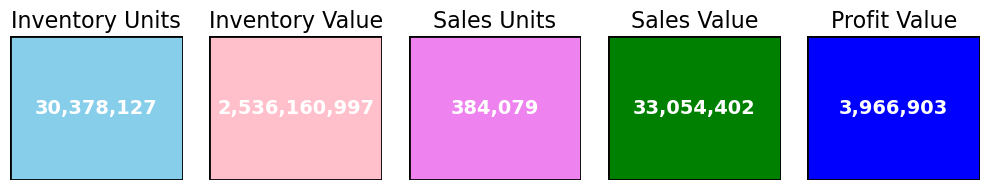

In [269]:
from matplotlib.patches import Rectangle

def kpi_card(ax, title, metric, color='lightblue'):
    ax.set_title(title, fontsize=16, color='black')
    ax.axis('off')
    ax.text(0.5, 0.5, f'{metric:,.0f}',fontsize=14, fontweight='bold',color='white', ha='center', va='center')
    rect = Rectangle((0, 0), 1, 1, linewidth=2, edgecolor='black', facecolor=color)
    ax.add_patch(rect)
fig, axs = plt.subplots(1, 5, figsize=(10, 2))


kpi_card(axs[0], "Inventory Units", Inventory_units, color='skyblue')
kpi_card(axs[1], "Inventory Value", Inventory_value, color='pink')
kpi_card(axs[2], "Sales Units", Sales_Units, color='violet')
kpi_card(axs[3], "Sales Value", Sales_value, color='green')
kpi_card(axs[4], "Profit Value", profit_value, color='blue')

plt.tight_layout()
plt.show()

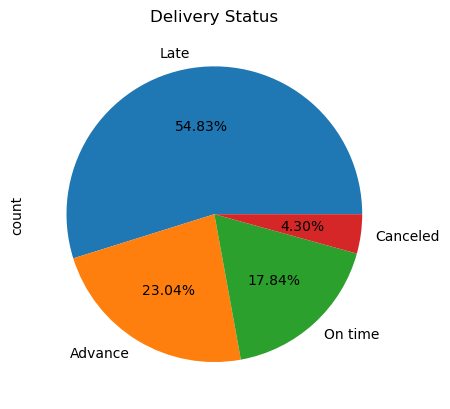

In [270]:
df['delivery_status'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Delivery Status')
plt.show()

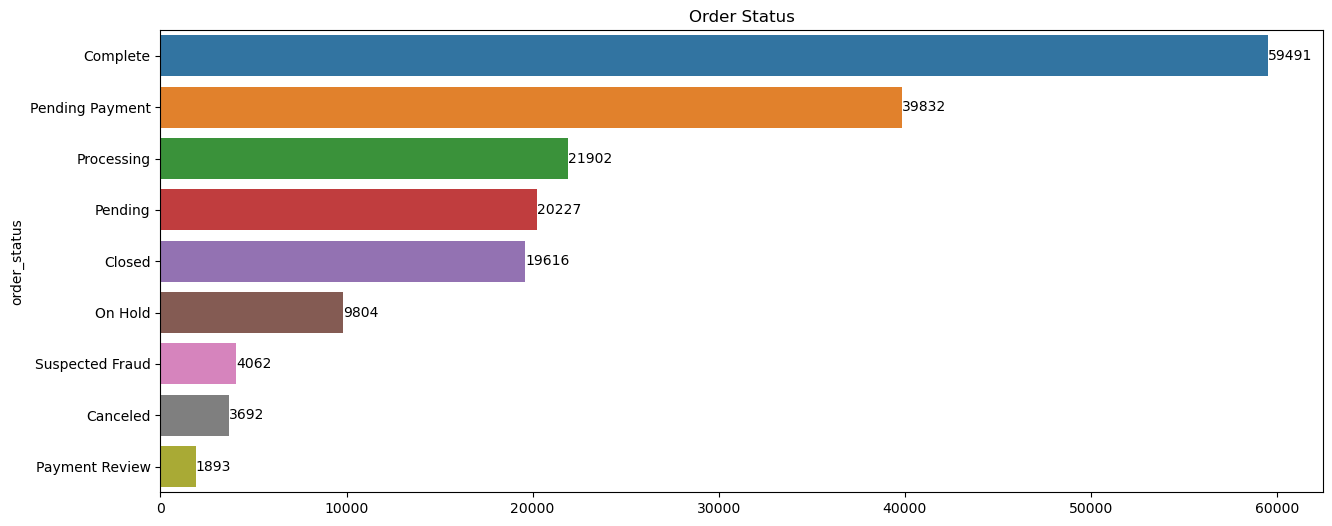

In [271]:
order_status= df['order_status'].value_counts()
plt.figure(figsize=(15,6))
a=sns.barplot(y=order_status.index,x=order_status.values)
for i in a.containers:
    a.bar_label(i)
plt.title('Order Status')
plt.show()

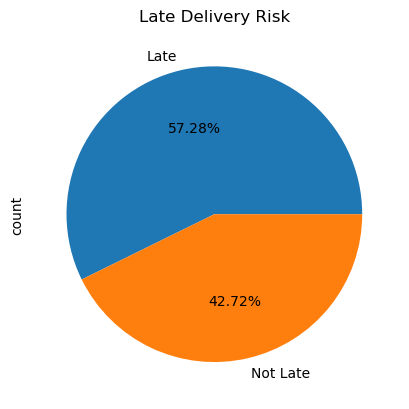

In [272]:
df['late_delivery_risk'].value_counts().plot(kind='pie',autopct='%.2f%%')

plt.title('Late Delivery Risk')
plt.show()

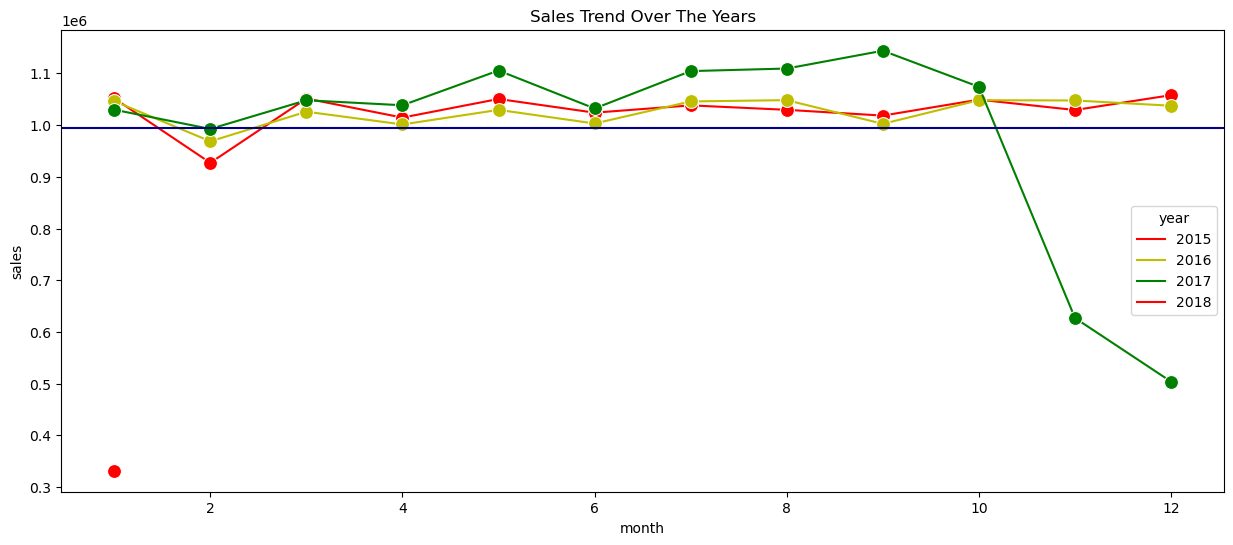

In [273]:
# Sales trends using line graph over the years
plt.figure(figsize=(15,6))
a= df.groupby(['year','month'])['sales'].sum().reset_index()
sns.lineplot(x='month', y='sales',hue='year', data=a,marker='o', markersize=10,palette=['r','y','g'])
plt.axhline(y=a['sales'].mean(), color='darkblue')

plt.title('Sales Trend Over The Years')
plt.show()


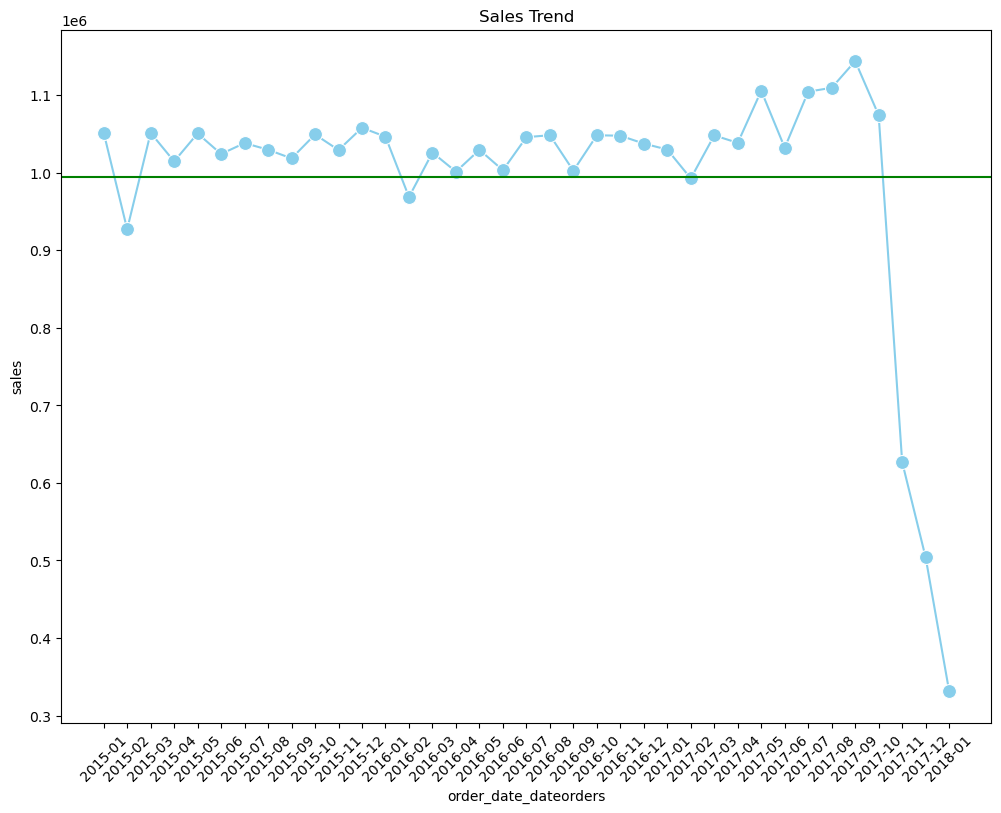

In [274]:
plt.figure(figsize=(12,9))
a= df.groupby(df['order_date_dateorders'].dt.strftime("%Y-%m"))['sales'].sum().reset_index()
sns.lineplot(x='order_date_dateorders', y='sales', data=a,marker='o', markersize=10,color='skyblue')
plt.axhline(y=a['sales'].mean(), color='green', linestyle='-')
plt.xticks(rotation=45)
plt.title('Sales Trend')
plt.show()


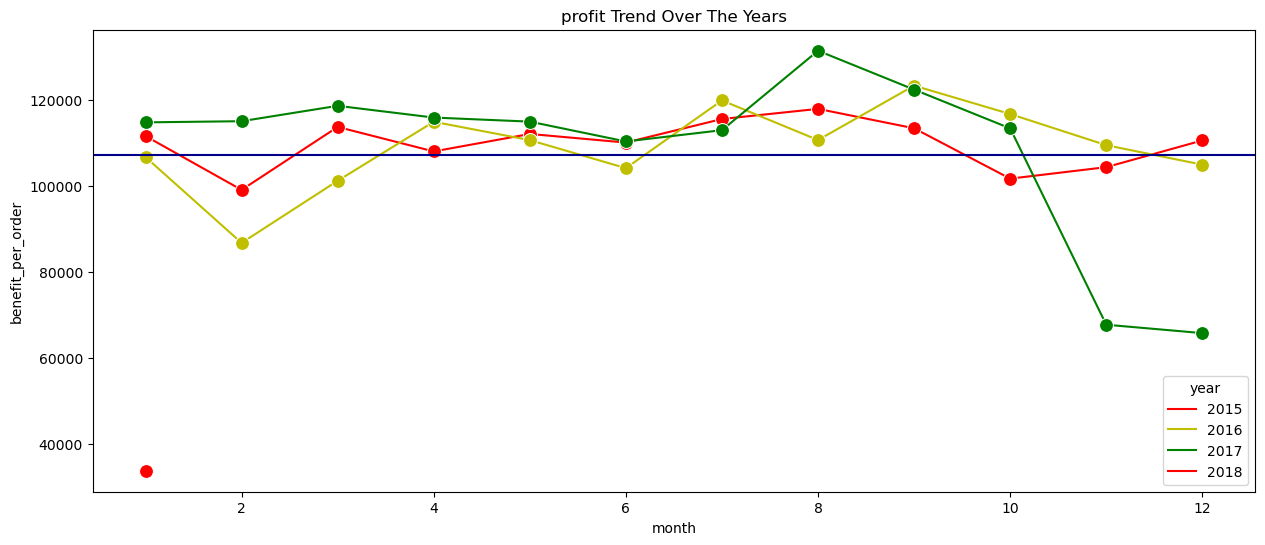

In [275]:
# profit trends using line graph over the years
plt.figure(figsize=(15,6))
a= df.groupby(['year','month'])['benefit_per_order'].sum().reset_index()
sns.lineplot(x='month', y='benefit_per_order',hue='year', data=a,marker='o', markersize=10,palette=['r','y','g'])
plt.axhline(y=a['benefit_per_order'].mean(), color='darkblue')

plt.title('profit Trend Over The Years')
plt.show()


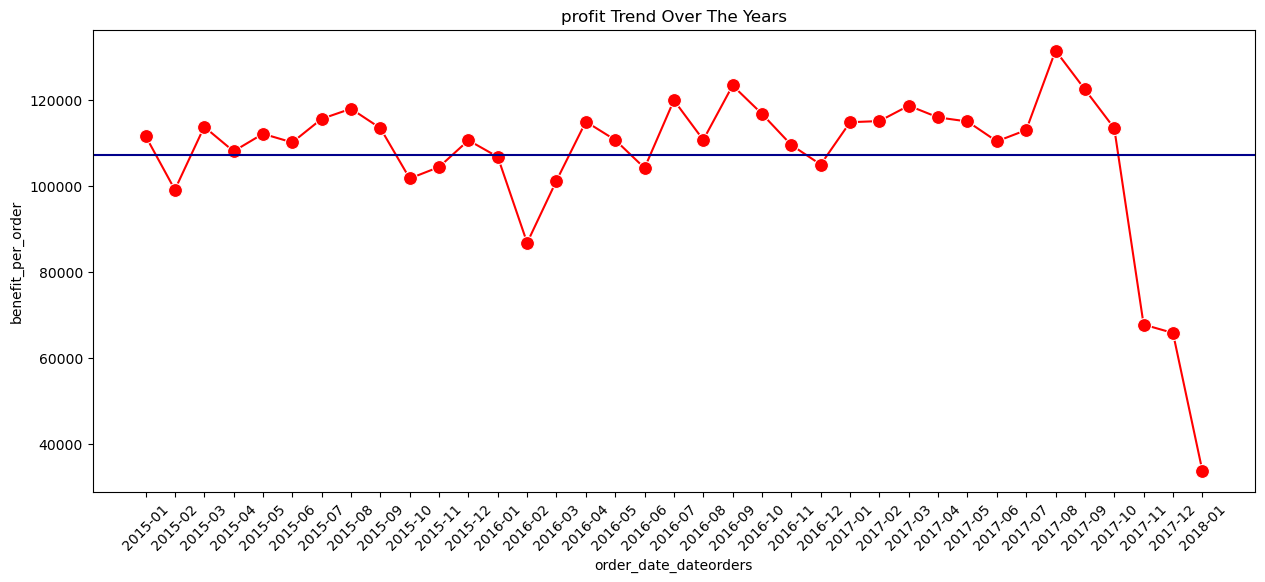

In [276]:
plt.figure(figsize=(15,6))
a= df.groupby(df['order_date_dateorders'].dt.strftime("%Y-%m"))['benefit_per_order'].sum().reset_index()
sns.lineplot(x='order_date_dateorders', y='benefit_per_order', data=a,marker='o', markersize=10,color='red')
plt.axhline(y=a['benefit_per_order'].mean(), color='darkblue')
plt.xticks(rotation=45)
plt.title('profit Trend Over The Years')
plt.show()


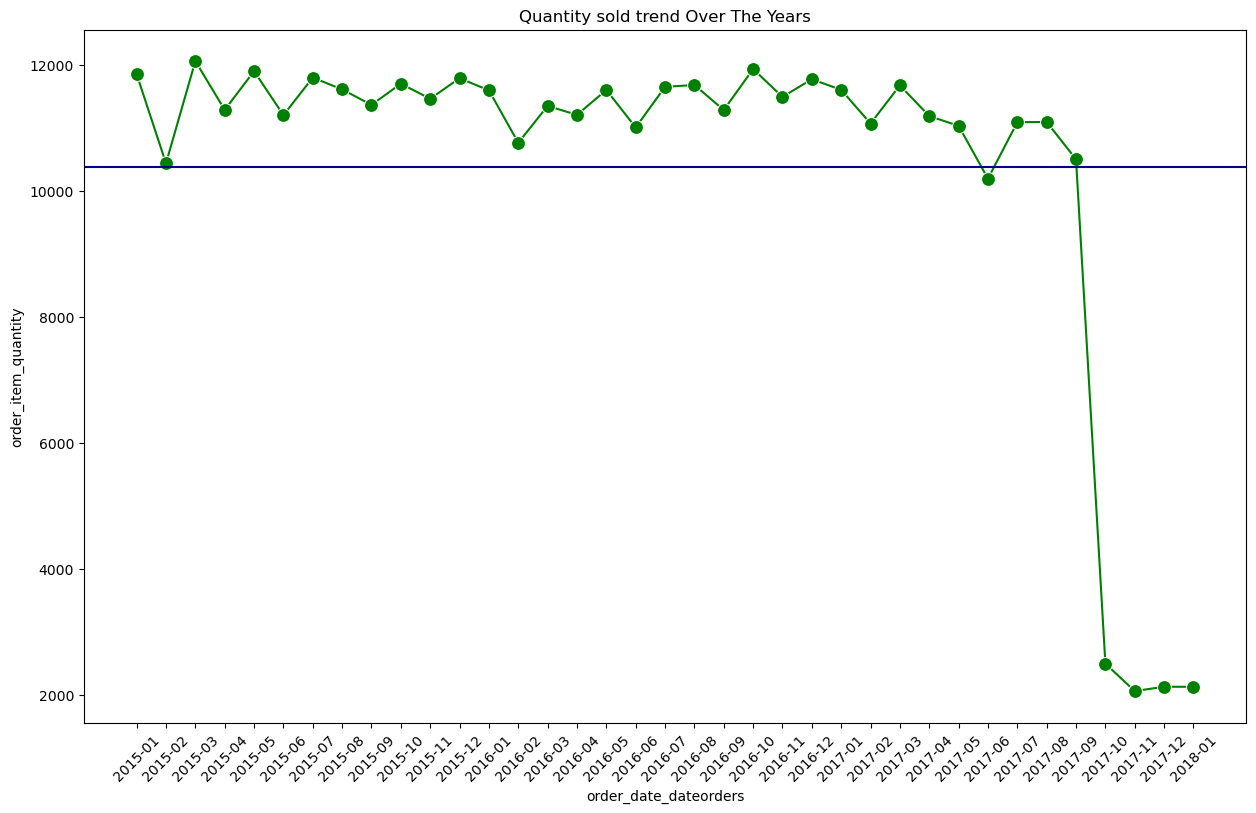

In [277]:
# order quantity trend
plt.figure(figsize=(15,9))
a= df.groupby(df['order_date_dateorders'].dt.strftime("%Y-%m"))['order_item_quantity'].sum().reset_index()
sns.lineplot(x='order_date_dateorders', y='order_item_quantity', data=a,marker='o', markersize=10,color='g')
plt.axhline(y=a['order_item_quantity'].mean(), color='darkblue')
plt.xticks(rotation=45)
plt.title('Quantity sold trend Over The Years')
plt.show()

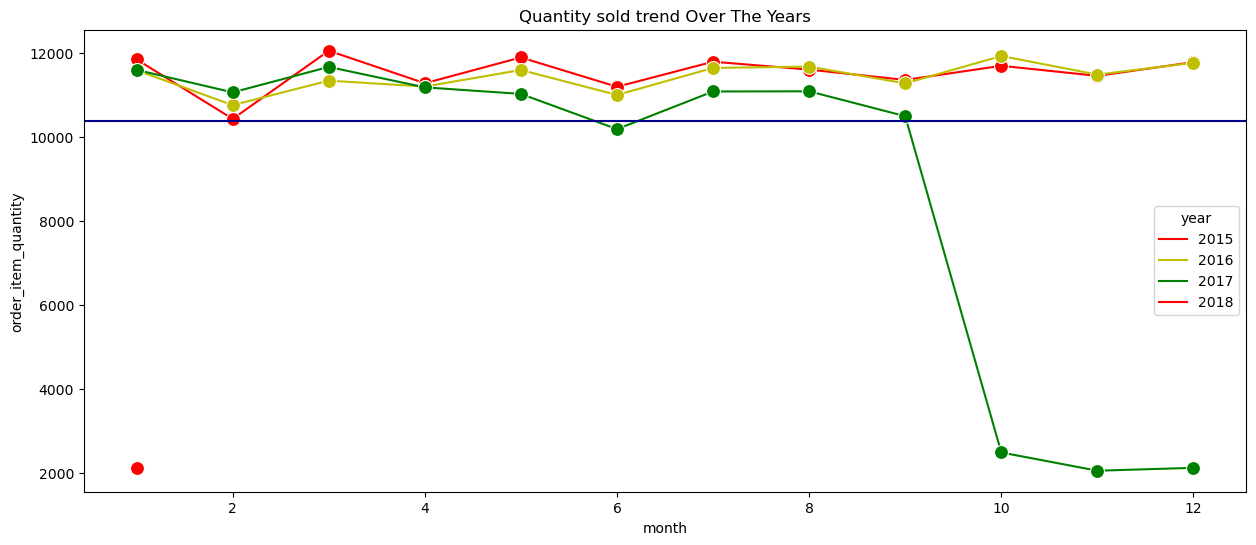

In [278]:
# order quantity trend
plt.figure(figsize=(15,6))
a= df.groupby(['year','month'])['order_item_quantity'].sum().reset_index()
sns.lineplot(x='month', y='order_item_quantity',hue='year', data=a,marker='o', markersize=10,palette=['r','y','g'])
plt.axhline(y=a['order_item_quantity'].mean(), color='darkblue')

plt.title('Quantity sold trend Over The Years')
plt.show()

In [279]:
inventory_by_cluster =df.groupby(by='class')[['current_stock','inventory_value']].sum()
inventory_by_cluster

current_stock  inventory_value
class                                                         
High Value-Small Number              13399842     1.387021e+09
Moderate Value-Moderate Number        6059123     5.615272e+08
Small Value-Large Number             10919162     5.876127e+08

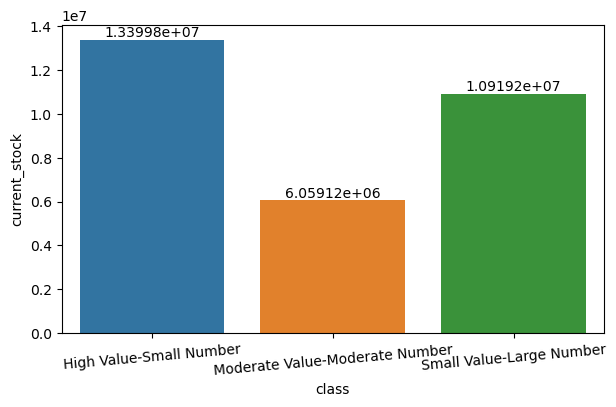

In [280]:
plt.figure(figsize=(7,4))
i=sns.barplot(x=inventory_by_cluster.index,y='current_stock',data=inventory_by_cluster)

plt.xticks(rotation=5)
for x in i.containers:
    i.bar_label(x)
plt.show()


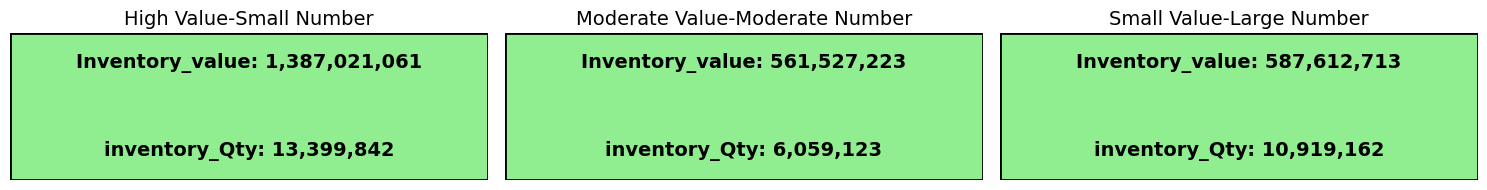

In [281]:
def create_kpi_card(ax, title, metric1, metric2, color='lightblue'):
    ax.set_title(title, fontsize=14, color='black')
    ax.axis('off')
    ax.text(0.5, 0.8, f'Inventory_value: {metric1:,.0f}', fontsize=14, fontweight='bold', color='black', ha='center', va='center')
    ax.text(0.5, 0.2, f'inventory_Qty: {metric2:,.0f}', fontsize=14, fontweight='bold', color='black', ha='center', va='center')
    rect = Rectangle((0, 0), 1, 1, linewidth=2, edgecolor='black', facecolor=color)
    ax.add_patch(rect)
fig, axs = plt.subplots(1, len(inventory_by_cluster), figsize=(15, 2))

for i, (class_name, row) in enumerate(inventory_by_cluster.iterrows()):
    create_kpi_card(axs[i], class_name, row['inventory_value'], row['current_stock'], color='lightgreen')

plt.tight_layout()
plt.show()

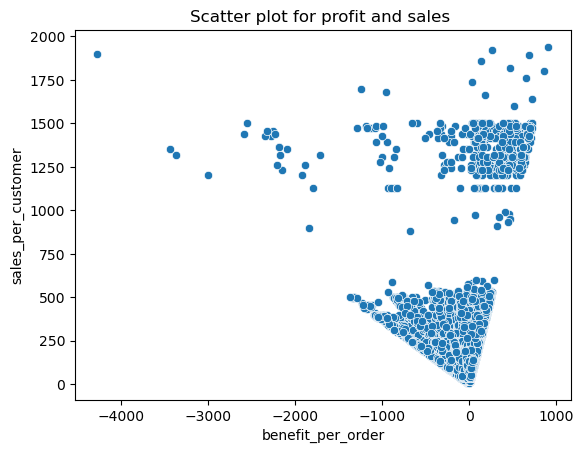

In [282]:
# I will create a scatter plot for quantity of products sold and sales_revenue
sns.scatterplot(data=df,x=df['benefit_per_order'],y=df['sales_per_customer'],markers='*')
plt.title('Scatter plot for profit and sales ')
plt.show()

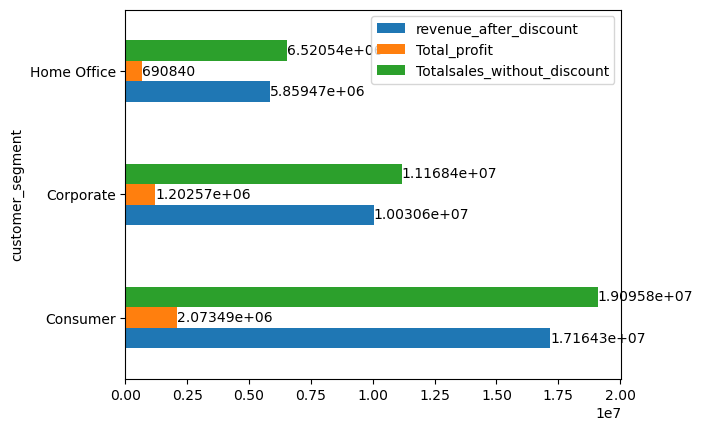

In [283]:
cust_seg = df.groupby(by='customer_segment')[['sales_per_customer','benefit_per_order','sales']].agg(revenue_after_discount=('sales_per_customer',np.sum),\
Total_profit=('benefit_per_order',np.sum),Totalsales_without_discount=('sales',np.sum))

a= cust_seg.plot(kind='barh')

for i in a.containers:
    a.bar_label(i)
plt.show()

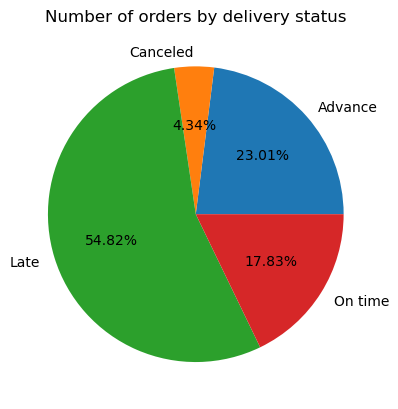

In [284]:
del_status =df.groupby(by='delivery_status')[['order_id']].agg(count=('order_id','nunique'))
plt.pie(data=del_status,x='count',labels=del_status.index,autopct='%0.2f%%')
plt.title("Number of orders by delivery status")
plt.show()

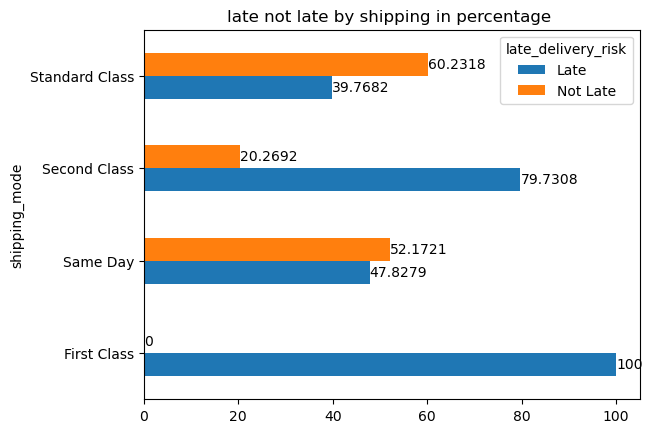

In [285]:
a=df.pivot_table(index='shipping_mode',columns='late_delivery_risk',values='product_id',aggfunc='count').fillna(0)
efficient_ship = a.div(a.sum(axis=1),axis=0)*100
c= efficient_ship.plot(kind='barh')
plt.title('late not late by shipping in percentage ')
for i in c.containers:
    c.bar_label(i)
plt.show()

# 1. Build predictive model to predict the sales (Hint: You are required to aggregate the data at customer level. It means that one record for one customer)


In [286]:
data=df[['category_name', 'class','customer_country','customer_id','customer_segment','order_status', 'type','benefit_per_order','order_item_quantity',\
 'product_price','sales', 'sales_per_customer','late_delivery_risk']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   category_name        180519 non-null  object 
 1   class                180519 non-null  object 
 2   customer_country     180519 non-null  object 
 3   customer_id          180519 non-null  int64  
 4   customer_segment     180519 non-null  object 
 5   order_status         180519 non-null  object 
 6   type                 180519 non-null  object 
 7   benefit_per_order    180519 non-null  float64
 8   order_item_quantity  180519 non-null  int64  
 9   product_price        180519 non-null  float64
 10  sales                180519 non-null  float64
 11  sales_per_customer   180519 non-null  float64
 12  late_delivery_risk   180519 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 17.9+ MB


In [287]:
# Aggregation at Customer Level inorder to suit our calculation
customer_data = data.groupby('customer_id').agg({
    'category_name':'first',
    'class': 'first',
    'customer_country': 'first',
    'customer_segment': 'first',
    'order_status': 'first',
    'type': 'first',
    'order_item_quantity': 'sum',
    'benefit_per_order': 'sum',
    'sales_per_customer': 'sum',
    'product_price': 'first',
    'sales': 'sum',
    'late_delivery_risk': 'first'
}).reset_index()

In [288]:
# continious variables summary
def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,x.sum(), x.mean(), x.std(), x.var(),lc_iqr, uc_iqr,
                        x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss','sum', 'mean', 'std', 'var','lc_iqr', 'uc_iqr',
                              'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95','p99','max'])
                        
                       




In [289]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20652 entries, 0 to 20651
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          20652 non-null  int64  
 1   category_name        20652 non-null  object 
 2   class                20652 non-null  object 
 3   customer_country     20652 non-null  object 
 4   customer_segment     20652 non-null  object 
 5   order_status         20652 non-null  object 
 6   type                 20652 non-null  object 
 7   order_item_quantity  20652 non-null  int64  
 8   benefit_per_order    20652 non-null  float64
 9   sales_per_customer   20652 non-null  float64
 10  product_price        20652 non-null  float64
 11  sales                20652 non-null  float64
 12  late_delivery_risk   20652 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [290]:
#separate the categorical and continuous variables as to support linear regression model

# creating a categorical and numerical data of customer_df
num_cust = customer_data.select_dtypes(exclude='object')
cat_cust = customer_data.select_dtypes('object')
# creating the variables with column names which is an array of column names
cat_cust_columns = customer_data.select_dtypes('object').columns
num_cust_columns = customer_data.select_dtypes(exclude='object').columns

In [291]:
# we are performing hot encoding on categorical variables using get dummies 
cat_cust = pd.get_dummies(cat_cust,drop_first=True,dtype='uint8')


In [292]:
cat_cust.shape

(20652, 48)

In [293]:
cat_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20652 entries, 0 to 20651
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   category_name_Baby                    20652 non-null  uint8
 1   category_name_Books                   20652 non-null  uint8
 2   category_name_CDs                     20652 non-null  uint8
 3   category_name_Cameras                 20652 non-null  uint8
 4   category_name_Camping & Hiking        20652 non-null  uint8
 5   category_name_Cardio Equipment        20652 non-null  uint8
 6   category_name_Children's Clothing     20652 non-null  uint8
 7   category_name_Cleats                  20652 non-null  uint8
 8   category_name_Computers               20652 non-null  uint8
 9   category_name_Consumer Electronics    20652 non-null  uint8
 10  category_name_Crafts                  20652 non-null  uint8
 11  category_name_DVDs                    206

In [294]:
num_cust.head(3)

customer_id  order_item_quantity  benefit_per_order  sales_per_customer  \
0            1                    5         159.690002          472.450012   
1            2                   19         208.739999         1618.660042   
2            3                   33         334.489999         3189.200037   

   product_price        sales  
0      99.989998   499.950012  
1      50.000000  1819.730034  
2      50.000000  3537.680094

In [295]:
# we are removing outliers in data if there and impute them with 1st and 99 percentile 

num_cust=num_cust.apply(lambda x:x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99)))

In [296]:
# after performing outlier imputation then we are imputing null values with mean values in numerical data

num_cust=num_cust.apply(lambda x:x.fillna(x.mean()))

In [297]:
num_cust.apply(continuous_var_summary)

customer_id order_item_quantity benefit_per_order  \
dtype               float64               int64           float64   
cardinality           20240                  71             17387   
n_tot                 20652               20652             20652   
n                     20652               20652             20652   
nmiss                     0                   0                 0   
perc_miss               0.0                 0.0               0.0   
sum             214786882.0              382196    4008764.813068   
mean           10400.294499           18.506488        194.110247   
std             5989.544825           18.894368        366.270827   
var          35874647.20602          356.997149     134154.318729   
lc_iqr             -10369.5               -45.5       -583.382491   
uc_iqr              31172.5                78.5        986.777485   
min                  208.51                   1       -866.424101   
p1                 208.7599                 1.0       -866.401614   
p5                  1046.55                 1.0       -360.938979   
p10                  2090.1                 1.0       -154.033999   
p25                 5208.75                 1.0            5.4275   
p50                 10407.5                14.0        109.830002   
p75                15594.25                32.0        397.967494   
p90                 18691.9                46.0        692.203003   
p95                19724.45                55.0        887.862989   
p99              20550.2401                71.0       1224.089614   
max                20550.49                  71       1224.099607   

            sales_per_customer   product_price           sales  
dtype                  float64         float64         float64  
cardinality              12415              34           11883  
n_tot                    20652           20652           20652  
n                        20652           20652           20652  
nmiss                        0               0               0  
perc_miss                  0.0             0.0             0.0  
sum            32915096.704825  3331404.139097  36632489.51138  
mean               1593.797051      161.311454      1773.79864  
std                1486.567547      238.300923     1653.511356  
var             2209883.072412    56787.329839  2734099.804968  
lc_iqr            -3294.360004     -191.275009    -3641.220077  
uc_iqr             6170.440014      452.125015     6850.140151  
min                       9.69           11.29           11.29  
p1                        9.69           11.29           11.29  
p5                        28.9           31.08           31.08  
p10                  47.259998       39.990002       59.080002  
p25                 254.940002            50.0      293.040008  
p50                1294.504997            50.0     1499.825033  
p75                2621.140007      210.850006     2915.880065  
p90                3754.810058      357.100006     4181.324104  
p95                4448.156548      461.480011     4939.512613  
p99                5818.735312          1500.0     6470.177341  
max                5818.855271          1500.0     6471.194434

In [298]:
# combine numerical and categorical data
cust_new = pd.concat([cat_cust, num_cust], axis = 1 )

In [299]:
cust_new.shape

(20652, 54)

In [300]:
# checking data types
cust_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20652 entries, 0 to 20651
Data columns (total 54 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   category_name_Baby                    20652 non-null  uint8  
 1   category_name_Books                   20652 non-null  uint8  
 2   category_name_CDs                     20652 non-null  uint8  
 3   category_name_Cameras                 20652 non-null  uint8  
 4   category_name_Camping & Hiking        20652 non-null  uint8  
 5   category_name_Cardio Equipment        20652 non-null  uint8  
 6   category_name_Children's Clothing     20652 non-null  uint8  
 7   category_name_Cleats                  20652 non-null  uint8  
 8   category_name_Computers               20652 non-null  uint8  
 9   category_name_Consumer Electronics    20652 non-null  uint8  
 10  category_name_Crafts                  20652 non-null  uint8  
 11  category_name_D

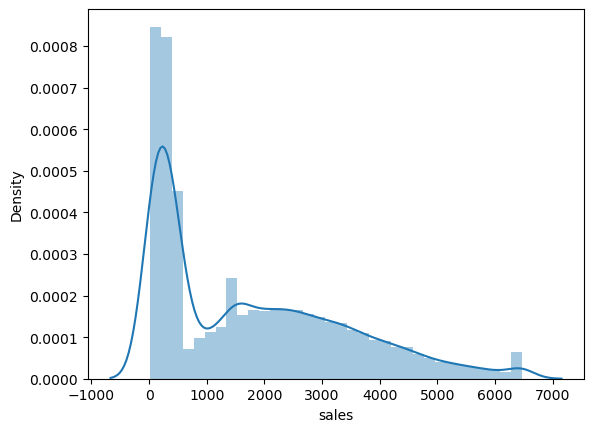

In [301]:
sns.distplot(cust_new.sales)
plt.show()

In [302]:
cust_new.sales.skew()

0.8118128546414942

In [303]:
# z score, log, exp to make Y follow normal distribution

In [304]:
cust_new['log_sales']=np.log(cust_new.sales)

<Axes: xlabel='log_sales', ylabel='Density'>

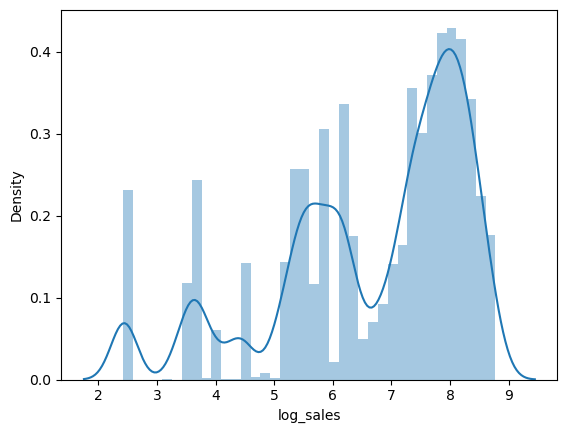

In [305]:
#Distribution of log sales

sns.distplot(cust_new.log_sales)

In [306]:
cust_new.log_sales.skew()

-0.9296167167622603

In [307]:
# since log transformed sales values skewness is higher than skewness of sales. we will go ahead with direct sales values
# and drop cust_new.log_sales columns

In [308]:
cust_new.drop(columns='log_sales',inplace=True)

In [309]:
cust_new.columns

Index(['category_name_Baby', 'category_name_Books', 'category_name_CDs',
       'category_name_Cameras', 'category_name_Camping & Hiking',
       'category_name_Cardio Equipment', 'category_name_Children's Clothing',
       'category_name_Cleats', 'category_name_Computers',
       'category_name_Consumer Electronics', 'category_name_Crafts',
       'category_name_DVDs', 'category_name_Electronics',
       'category_name_Fishing', 'category_name_Garden',
       'category_name_Girls' Apparel', 'category_name_Golf Balls',
       'category_name_Golf Gloves', 'category_name_Health and Beauty',
       'category_name_Indoor/Outdoor Games', 'category_name_Men's Clothing',
       'category_name_Men's Footwear', 'category_name_Music',
       'category_name_Pet Supplies', 'category_name_Shop By Sport',
       'category_name_Sporting Goods', 'category_name_Toys',
       'category_name_Video Games', 'category_name_Water Sports',
       'category_name_Women's Apparel', 'category_name_Women's Clothin

In [310]:
#we will have to transform column names for model to run
cust_new.columns = cust_new.columns.str.replace("-","_").str.replace(" ",'').str.replace("/" ,'_').str.replace("&" ,'_').str.replace("'","")

In [311]:
cust_new.columns

Index(['category_name_Baby', 'category_name_Books', 'category_name_CDs',
       'category_name_Cameras', 'category_name_Camping_Hiking',
       'category_name_CardioEquipment', 'category_name_ChildrensClothing',
       'category_name_Cleats', 'category_name_Computers',
       'category_name_ConsumerElectronics', 'category_name_Crafts',
       'category_name_DVDs', 'category_name_Electronics',
       'category_name_Fishing', 'category_name_Garden',
       'category_name_GirlsApparel', 'category_name_GolfBalls',
       'category_name_GolfGloves', 'category_name_HealthandBeauty',
       'category_name_Indoor_OutdoorGames', 'category_name_MensClothing',
       'category_name_MensFootwear', 'category_name_Music',
       'category_name_PetSupplies', 'category_name_ShopBySport',
       'category_name_SportingGoods', 'category_name_Toys',
       'category_name_VideoGames', 'category_name_WaterSports',
       'category_name_WomensApparel', 'category_name_WomensClothing',
       'class_ModerateV

In [312]:
x_var=cust_new.columns.difference(['sales'])

y_var='sales'

In [313]:
train,test=train_test_split(cust_new,test_size=0.3,random_state=124)

In [314]:
train.shape

(14456, 54)

In [315]:
test.shape

(6196, 54)

In [316]:
formula=y_var +' ~ '+' + '.join(x_var)

In [317]:
formula

'sales ~ benefit_per_order + category_name_Baby + category_name_Books + category_name_CDs + category_name_Cameras + category_name_Camping_Hiking + category_name_CardioEquipment + category_name_ChildrensClothing + category_name_Cleats + category_name_Computers + category_name_ConsumerElectronics + category_name_Crafts + category_name_DVDs + category_name_Electronics + category_name_Fishing + category_name_Garden + category_name_GirlsApparel + category_name_GolfBalls + category_name_GolfGloves + category_name_HealthandBeauty + category_name_Indoor_OutdoorGames + category_name_MensClothing + category_name_MensFootwear + category_name_Music + category_name_PetSupplies + category_name_ShopBySport + category_name_SportingGoods + category_name_Toys + category_name_VideoGames + category_name_WaterSports + category_name_WomensApparel + category_name_WomensClothing + class_ModerateValue_ModerateNumber + class_SmallValue_LargeNumber + customer_country_PuertoRico + customer_id + customer_segment_C

In [318]:
ml_1=smf.ols(formula,train).fit()

In [319]:
print(ml_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.587e+05
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:15:34   Log-Likelihood:                -78810.
No. Observations:               14456   AIC:                         1.577e+05
Df Residuals:                   14407   BIC:                         1.581e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [320]:
ml_1.predict(test)

10231    4690.846677
4793     4335.125066
13478     367.603498
7477     1681.282495
5589     5280.598303
            ...     
13628     393.122005
11237    4148.625819
12250     853.740736
12684      61.224906
13953    1658.351852
Length: 6196, dtype: float64

In [321]:
ml_1.predict(train)

13194     437.244765
16183     269.185251
18406     485.175110
18728     278.189475
7245     6447.220359
            ...     
681      1712.988185
9154     3236.803202
14353     252.328347
4764     2058.870100
4558     2057.032965
Length: 14456, dtype: float64

In [322]:
mse_train=mean_squared_error(train.sales,(ml_1.predict(train)))
mse_test=mean_squared_error(test.sales,(ml_1.predict(test)))
print('Mean squared Error train and test is ',mse_train,mse_test)
print('Root Mean squared error train and test is ',np.sqrt(mse_train),np.sqrt(mse_test))

Mean squared Error train and test is  3182.9610099146203 3307.746190381707
Root Mean squared error train and test is  56.41773666068695 57.51300887957182


In [323]:
cust_new['predicted_sales'] =pd.concat([ml_1.predict(test),ml_1.predict(train)]).sort_index()

In [324]:
# since my root mean squared error for both training and testing model are very close to each other we may call it perfect model
#But too much perfection tends overfit model hence i have checked for the multi-collinearity using variance infation factor


In [325]:
#Feature selection technique
#solving the frobem of multicollinearity technique using VIF

<Axes: >

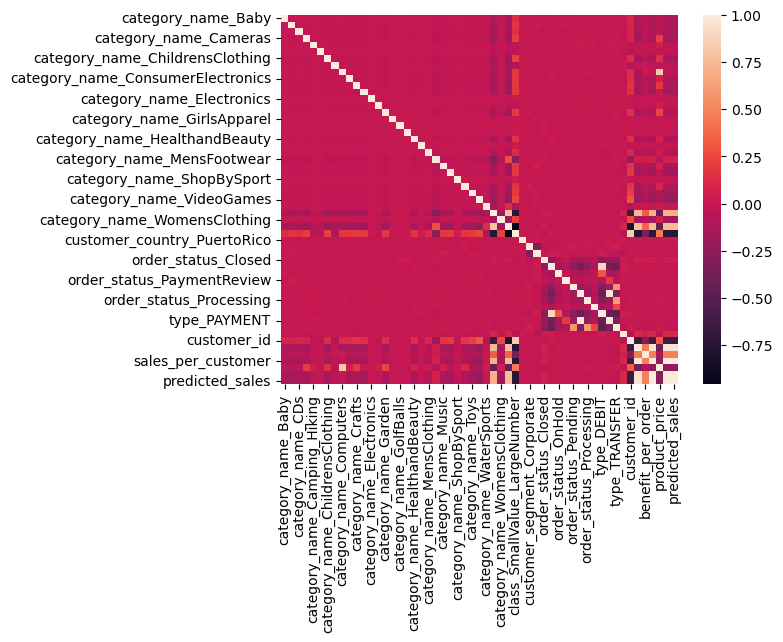

In [326]:
sns.heatmap(cust_new.corr())

In [327]:
y,x=dmatrices(formula,cust_new,return_type='dataframe')
x.columns

Index(['Intercept', 'benefit_per_order', 'category_name_Baby',
       'category_name_Books', 'category_name_CDs', 'category_name_Cameras',
       'category_name_Camping_Hiking', 'category_name_CardioEquipment',
       'category_name_ChildrensClothing', 'category_name_Cleats',
       'category_name_Computers', 'category_name_ConsumerElectronics',
       'category_name_Crafts', 'category_name_DVDs',
       'category_name_Electronics', 'category_name_Fishing',
       'category_name_Garden', 'category_name_GirlsApparel',
       'category_name_GolfBalls', 'category_name_GolfGloves',
       'category_name_HealthandBeauty', 'category_name_Indoor_OutdoorGames',
       'category_name_MensClothing', 'category_name_MensFootwear',
       'category_name_Music', 'category_name_PetSupplies',
       'category_name_ShopBySport', 'category_name_SportingGoods',
       'category_name_Toys', 'category_name_VideoGames',
       'category_name_WaterSports', 'category_name_WomensApparel',
       'category_name

In [328]:
x.drop(columns='Intercept',inplace=True)

In [329]:
vif=pd.DataFrame()

In [330]:
vif['Features']=x.columns
vif['vif_factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [331]:
vif.sort_values(by='vif_factor',ascending=True,inplace=True)

In [332]:
sig_vif = vif['Features'][vif['vif_factor'] <=5 ]

In [333]:
sig_formula=y_var +"  ~  "+ "  +  ".join(sig_vif)

In [334]:
sig_formula

'sales  ~  customer_country_PuertoRico  +  late_delivery_risk_NotLate  +  customer_segment_Corporate  +  customer_segment_HomeOffice  +  benefit_per_order  +  category_name_GirlsApparel  +  category_name_GolfBalls  +  order_status_SuspectedFraud  +  category_name_Electronics  +  category_name_GolfGloves  +  category_name_Indoor_OutdoorGames  +  customer_id'

In [335]:
ml_2 = smf.ols(sig_formula,train).fit()

In [336]:
print(ml_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     1202.
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:15:42   Log-Likelihood:            -1.2267e+05
No. Observations:               14456   AIC:                         2.454e+05
Df Residuals:                   14443   BIC:                         2.455e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [337]:
ml_2.predict(train)

13194    1280.047553
16183     652.910738
18406     510.561162
18728     156.273422
7245     3664.999557
            ...     
681      1605.341639
9154     2577.964767
14353     427.233423
4764     3204.804096
4558     3183.563911
Length: 14456, dtype: float64

In [338]:
ml_2.predict(test)

10231    3054.755779
4793     3657.518113
13478    1279.691437
7477     1739.174416
5589     3133.138743
            ...     
13628     584.674767
11237    1766.035749
12250    1464.236071
12684    1204.816523
13953     141.582683
Length: 6196, dtype: float64

In [339]:
mse_train=mean_squared_error(train.sales,(ml_2.predict(train)))
mse_test=mean_squared_error(test.sales,(ml_2.predict(test)))

In [340]:
print('mse for train and test are',mse_train,mse_test)
print('root mse for train and test are',np.sqrt(mse_train),np.sqrt(mse_test))

mse for train and test are 1374605.0011904894 1359206.4543438384
root mse for train and test are 1172.4354997996645 1165.8500994312426


In [341]:
cust_new['predicted_sales_after_vif'] =pd.concat([ml_2.predict(test),ml_2.predict(train)]).sort_index()

In [342]:
cust_new

category_name_Baby  category_name_Books  category_name_CDs  \
0                       0                    0                  0   
1                       0                    0                  0   
2                       0                    0                  0   
3                       0                    0                  0   
4                       0                    0                  0   
...                   ...                  ...                ...   
20647                   0                    0                  0   
20648                   0                    0                  0   
20649                   0                    0                  0   
20650                   0                    0                  0   
20651                   0                    0                  0   

       category_name_Cameras  category_name_Camping_Hiking  \
0                          0                             0   
1                          0                             0   
2                          0                             0   
3                          0                             0   
4                          0                             0   
...                      ...                           ...   
20647                      0                             0   
20648                      0                             0   
20649                      0                             0   
20650                      0                             0   
20651                      0                             0   

       category_name_CardioEquipment  category_name_ChildrensClothing  \
0                                  1                                0   
1                                  0                                0   
2                                  0                                0   
3                                  0                                0   
4                                  0                                0   
...                              ...                              ...   
20647                              0                                0   
20648                              0                                0   
20649                              0                                0   
20650                              0                                0   
20651                              0                                0   

       category_name_Cleats  category_name_Computers  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   
...                     ...                      ...   
20647                     0                        0   
20648                     0                        0   
20649                     0                        0   
20650                     0                        0   
20651                     0                        0   

       category_name_ConsumerElectronics  ...  type_TRANSFER  \
0                                      0  ...              0   
1                                      0  ...              0   
2                                      0  ...              0   
3                                      0  ...              0   
4                                      0  ...              0   
...                                  ...  ...            ...   
20647                                  0  ...              1   
20648                                  0  ...              0   
20649                                  0  ...              0   
20650                                  0  ...              0   
20651                                  0  ...              0   

       late_delivery_risk_NotLate  customer_id  order_item_quantity  \
0                               0       208

In [343]:
# After predicting train and test values by doing vif checking my r^2 square value was 0.49 -0.5 which is way too less than
#what i have predicted sales values hence i may consider using my first model for sales prediction

In [344]:
customer_data['predicted_sales']=pd.concat([ml_1.predict(test),ml_1.predict(train)]).sort_index()

In [345]:
customer_data

customer_id     category_name                           class  \
0                1  Cardio Equipment         High Value-Small Number   
1                2   Women's Apparel  Moderate Value-Moderate Number   
2                3   Women's Apparel  Moderate Value-Moderate Number   
3                4   Women's Apparel  Moderate Value-Moderate Number   
4                5    Men's Footwear  Moderate Value-Moderate Number   
...            ...               ...                             ...   
20647        20753  Women's Clothing        Small Value-Large Number   
20648        20754  Women's Clothing        Small Value-Large Number   
20649        20755    Sporting Goods        Small Value-Large Number   
20650        20756              Toys        Small Value-Large Number   
20651        20757       Video Games        Small Value-Large Number   

      customer_country customer_segment     order_status      type  \
0              EE. UU.         Consumer         Complete     DEBIT   
1              EE. UU.         Consumer         Complete     DEBIT   
2          Puerto Rico         Consumer         Complete     DEBIT   
3              EE. UU.         Consumer         Complete     DEBIT   
4          Puerto Rico      Home Office         Complete     DEBIT   
...                ...              ...              ...       ...   
20647      Puerto Rico         Consumer       Processing  TRANSFER   
20648          EE. UU.         Consumer         Complete     DEBIT   
20649      Puerto Rico         Consumer         Complete     DEBIT   
20650          EE. UU.        Corporate  Pending Payment   PAYMENT   
20651          EE. UU.        Corporate           Closed      CASH   

       order_item_quantity  benefit_per_order  sales_per_customer  \
0                        5         159.690002          472.450012   
1                       19         208.739999         1618.660042   
2                       33         334.489999         3189.200037   
3                       34        -439.979992         1480.709993   
4                       18         309.850002         1101.919998   
...                    ...                ...                 ...   
20647                    1        -107.959999          161.869995   
20648                    1        -126.559998          172.660004   
20649                    1          91.250000          314.640015   
20650                    1           1.530000           10.910000   
20651                    1           9.790000           34.980000   

       product_price        sales late_delivery_risk  predicted_sales  
0          99.989998   499.950012               Late       524.828118  
1          50.000000  1819.730034               Late      1803.148305  
2          50.000000  3537.680094           Not Late      3540.552792  
3          50.000000  1719.630030               Late      1675.655595  
4         129.990005  1274.750023           Not Late      1239.644683  
...              ...          ...                ...              ...  
20647     215.820007   215.820007               Late       181.790484  
20648     215.820007   215.820007           Not Late       191.649730  
20649     327.750000   327.750000           Not Late       348.718503  
20650      11.540000    11.540000           Not Late        12.193466  
20651      39.750000    39.750000               Late        38.079376  

[20652 rows x 14 columns]